# Deep Learning for Computer Vision
## Final Project Notebook
Roman Staneker, Ulrich Bryol Tene, Fatima Kohne

# 1 Introduction

The world's population is now growing exponentially. It is estimated that there are about 4.2 billion people in the world, 55% of whom live in cities where the rich and the poor live together, leading to a dramatic increase in levels of inequality, as the better-off populations tend to have a higher average economic status, with better education and better health than the poor. This difference in inequality is increasingly observable in large metropolitan areas. As urbanisation and social inequality are two main policy themes of this era, reducing inequality is at the forefront of the global sustainable development agenda and is a main policy objective in many cities (GLA, 2017, 2018). However, tracking and monitoring social, economic, environmental and health outcomes in cities at high spatial and temporal resolution is therefore difficult, as the datasets to inform these policies and measure actual impacts are currently derived from disjointed and not efficient monitoring systems. Measuring socio-economic status (SES) at high spatial and temporal resolution therefore becomes an important challenge for informing and evaluating policy. In most countries and cities, such rich data are scarce and therefore measuring these inequalities is a critical issue as data on different environmental, social and health measures are often collected using very expensive processes and come from a variety of sources with different spatial resolutions and frequencies.
Therefore, the use of other emerging sources of large-scale data, such as street imagery, GPS trajectories coupled with advances in deep learning methods have the potential to significantly advance and improve the speed, frequency, and proximity with which we can measure the characteristics of cities and populations in order to inform and better assess policies regarding urban inequalities. One example that is attracting the attention of some researchers is the use of street-level imagery to estimate or predict economic factors such as household income, education, crime, poverty, employment levels, unemployment, safety, housing prices, living standards etc. in a wider context. These new methods can facilitate the identification of specific areas of concern at early stages of increasing need so that interventions can be rapidly implemented through policies that aim to address them. 
In our work we use street-level images within Los Angeles to predict household income for small statistical areas. We compare the performance of three different models using cross-validation methods for our deep models. 

# 2 Related work

The increasing availability of satellite and street-level imagery and advances in deep learning methods have led to a growing number of studies that focus on various applications of deep learning to estimate socio-economic characteristics. Several studies show that street images are increasingly used as a source of information in the fields of economics and environmental health, using manual visual inspection techniques and machine learning methods. Relevant applications of machine learning with imagery and the most useful literatures we consulted are that authored by those who had also worked with a Street View dataset.
In a recent study, Suel et al (2021), to measure the spatial distributions of income, education, unemployment, housing, living environment, health, and crime, applied a deep learning method to street images of London. Directly from raw images without extracting the intermediate characteristics defined by the user, the models used by these authors predict different results and the best performances were obtained for the quality of the living environment and the average income. The results of this research demonstrate that street-level imagery has the potential to complement traditional administrative and survey-based data sources for high-resolution urban surveillance to measure inequalities and monitor the impacts of policies to address them
Using deep learning-based computer vision techniques Gebru et al. (2017) extracted as feature, the car types, years and brands from 50 million Google Street View images to correlate with socio-economic factors such as geographic demographic types and income in different US cities. They found that car types, years, and makes can be used as features to accurately estimate income, race, education, and voting patterns at both the zip code and precinct level. In a similar work Acharya et al. (2017) estimated demographics from vehicles found in Street View images as a proxy for predicting political affiliation. Rundle et al. (2011) explored the viability of using Google Street View images for auditing neighbourhood environments and found high levels of concordance for over half of the items.
The availability of large-scale street image data has allowed authors such as Naik et al, Liu et al and Law et al in their recent studies to extract urban knowledge. For example, Naik et al. (2014) used Google Street view images to predict the perceived safety of a streetscape using generic image features and perceived safety scores from a crowdsourced study. These researchers succeed in demonstrating that a trained predictor can accurately predict the safety scores of streetscapes not used in the training dataset.
Ordonez and Berg (2014) applied regression and classification models on image features using computer vision techniques to predict safety, uniqueness, and wealth, prediction joint features and they validated the results against local income and crime statistics.
To measure changes in the physical appearance of neighbourhoods, Naik, Nikhil, et al. developed a computer vision approach based on panoramic street images from five US cities using the Google Street View application programming interface. The results obtained show how traditional techniques combined with computer vision methods can be used to explore the dynamics of urban change.

# 3 Data

For the previously described problem we need statistical data on income for small areas and tight coverage of street-level images. We chose the Los Angeles County (LAC), since both publicly available census data on a low level as well as a good coverage through different providers are available. Furthermore, the choice was initially supported by the fact, that LAC has both densly populated metropolitan areas as well as sparsely populated areas.

## Statistical and geographic data

The smallest statistical unit in the American census system, which provides median annual household income estimates are census block groups (BGs). There are 6423 BGs in LAC with approximately 1500 inhabitants per unit. From the official geo-statistical platform of the Los Angeles County administration (2021), we aquired a shapefile, which includes the geometries of all census block groups in the LAC. Due to resource constraints we limited ourselves to 1066 BGs in Los Angeles, which were chosen by drawing a rectangle and including all BGs that intersect with the it.

For all BGs, 5-year median annual household income estimates published in 2017 were downloaded from the official data platform of the United States Census Bureau (2021), which is the most current version of this data. Furthermore, the middle year of the 5-year estimates is 2015, which coincides with approximate time stamp of most of the street-level images. The data was cleaned and observations with missing income values were dropped. For the classification problems the income data was classified into deciles ranging from 0 to 9. The deciles were calulated based on all LAC observations as opposed to calculating them with the smaller sample. This leads to a slightly skewed distribution, since within the smaller area there are more lower-income BGs, but the bins are split more evenly making the distinctions clearer, which helps the model's performance. 

## Street-level images

Due to tighter resource constraints, we chose not to purchase access to Google Street View images, but opted for Bing Images, who provide a yearly free contingent of 125,000 queries per person for their Street-side data pool. For the each of the above-mentioned 1066 census block groups, 20 unique random locations within the block group were chosen and the nearest possible unique location for which street-level images were available were identified. This was possible for all but one of the block groups, for which the coverage was too sparse. For each of the remaining block groups 20 times 4 tiles for each direction (0°, 90°, 180°, 270°) was downloaded, amounting to 85,200 colored jpeg images of size 256 x 256. Most of the pictures were taken around 2015.

### Importing the shapefile and adjusting the coordinate reference system

epsg:3857
epsg:4326


,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTAre,ShapeSTLen,geometry
6372,6374,060371011101,1011101,101110,0.1727,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Tujunga,4.814366e+06,8706.027696,"POLYGON ((-118.28848 34.26282, -118.28764 34.2..."
4126,4128,060371011102,1011102,101110,0.1368,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Tujunga,3.814445e+06,8807.809581,"POLYGON ((-118.29134 34.25956, -118.29132 34.2..."
4642,4644,060371011103,1011103,101110,0.1315,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Tujunga,3.666841e+06,8335.114480,"POLYGON ((-118.29793 34.26323, -118.29697 34.2..."
2737,2739,060371011221,1011221,101122,0.6139,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Tujunga,1.711345e+07,19507.471377,"POLYGON ((-118.29024 34.27100, -118.29070 34.2..."
2738,2740,060371011222,1011222,101122,0.4069,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Tujunga,1.134427e+07,19207.990469,"POLYGON ((-118.27743 34.25991, -118.27747 34.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,2963,060379800281,9800281,980028,6.7012,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Westchester,1.868192e+08,82673.924736,"POLYGON ((-118.38574 33.95531, -118.38586 33.9..."
2239,2241,060379800301,9800301,980030,1.6528,BG 1,22412,22412,El Segundo,El Segundo,City of El Segundo,4.607696e+07,30074.496291,"POLYGON ((-118.42223 33.91633, -118.42062 33.9..."
2240,2242,060379800311,9800311,980031,5.6304,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - San Pedro,1.569654e+08,211109.886978,"MULTIPOLYGON (((-118.24745 33.75227, -118.2473..."
2241,2243,060379800331,9800331,980033,4.7270,BG 1,43000,43000,Long Beach,Long Beach,City of Long Beach,1.317802e+08,202492.543127,"MULTIPOLYGON (((-118.20878 33.78269, -118.2082..."


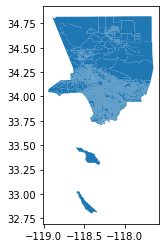

In [ ]:
import geopandas as gpd

root = "/" # set directory

fp = root + "2010_Census_Block_Groups_(Geography_Only)/2010_Census_Block_Groups_(Geography_Only).shp"

d = gpd.read_file(fp)
print(d.crs)
d = d.to_crs(epsg=4326) # adjusting the coordinate reference system to be compatible with GPS coordinates
print(d.crs)
d = d.sort_values(['GEOID10'])
d.plot()
d


### Restricting the sample

,geometry
0,"POLYGON ((-118.50000 34.04000, -118.25000 34.0..."


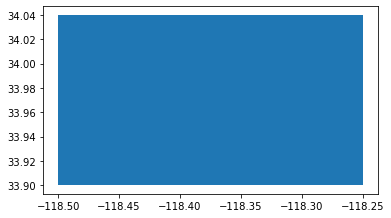

In [ ]:
from shapely.geometry import Polygon
# sq = [Polygon(([-118.5, 34.04], [-118.09,34.04], [-118.09, 33.84], [-118.5,33.84]))]
sq = [Polygon(([-118.5, 34.04], [-118.25,34.04], [-118.25, 33.9], [-118.5,33.9]))]
square = gpd.GeoDataFrame()
square['geometry'] = sq
square.set_crs(epsg=4326)
square.plot()
square

<AxesSubplot:>

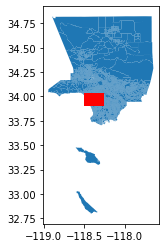

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
square.plot(ax=ax, color='red', zorder=2) #rot und fett die actual locations
d.plot(ax=ax, zorder=1)

In [ ]:
d['geometry'].intersects(square['geometry'][0])==True

6372    False
4126    False
4642    False
2737    False
2738    False
        ...  
2961     True
2239     True
2240    False
2241    False
2289    False
Length: 6423, dtype: bool

In [ ]:
square2010 = d[d['geometry'].intersects(square['geometry'][0])==True]
square2010 = square2010.sort_values('GEOID10').reset_index()
square2010

,index,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTAre,ShapeSTLen,geometry
0,6101,6103,060372079001,2079001,207900,0.2419,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Downtown,6.744690e+06,11059.851330,"POLYGON ((-118.25714 34.04303, -118.25661 34.0..."
1,6102,6104,060372079002,2079002,207900,0.1067,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Downtown,2.975887e+06,7680.001411,"POLYGON ((-118.26038 34.04513, -118.26172 34.0..."
2,4333,4335,060372181102,2181102,218110,0.1021,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - West Adams/Exposition Park,2.846234e+06,7021.962824,"POLYGON ((-118.32367 34.04356, -118.32366 34.0..."
3,4336,4338,060372181202,2181202,218120,0.0508,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - West Adams/Exposition Park,1.416372e+06,5543.633274,"POLYGON ((-118.31771 34.03992, -118.31890 34.0..."
4,2969,2971,060372181203,2181203,218120,0.0352,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - West Adams/Exposition Park,9.811388e+05,4824.581078,"POLYGON ((-118.32009 34.03991, -118.32128 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,305,306,060377032005,7032005,703200,0.1987,BG 5,82667,99037,View Park-Windsor Hills,Unincorporated,LA County - View Park/Windsor Hills,5.540340e+06,11141.920610,"POLYGON ((-118.34371 34.00172, -118.34367 34.0..."
1062,264,265,060377032006,7032006,703200,0.1425,BG 6,82667,99037,View Park-Windsor Hills,Unincorporated,LA County - View Park/Windsor Hills,3.973790e+06,9549.213605,"POLYGON ((-118.33728 33.99308, -118.33727 33.9..."
1063,2104,2106,060379800131,9800131,980013,2.0497,BG 1,22412,22412,El Segundo,El Segundo,City of El Segundo,5.714361e+07,34275.585526,"POLYGON ((-118.37844 33.92901, -118.37844 33.9..."
1064,2961,2963,060379800281,9800281,980028,6.7012,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Westchester,1.868192e+08,82673.924736,"POLYGON ((-118.38574 33.95531, -118.38586 33.9..."


In [ ]:
area = square2010['geometry'].to_crs(3857).area.sum()
area

486511420.75904894

<AxesSubplot:>

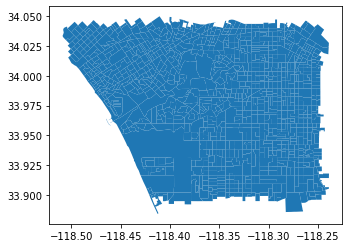

In [ ]:
square2010.plot()

<AxesSubplot:>

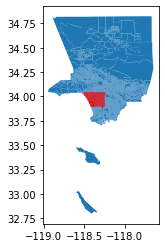

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')
square2010.plot(ax=ax, color='red', zorder=2) #rot und fett die actual locations
d.plot(ax=ax, zorder=1)

### Downloading the images

In [ ]:
## definging function to download block group data
from shapely.geometry import Point
import random
import urllib.request, json 
import csv
import os
import matplotlib.pyplot as plt
import time
import pandas as pd
from datetime import datetime


def exportblockgroupdata(start_bg, num_bg, num_loc): # start_bg = which bg to start with (zero-indexed), num_bg = how many bgs?, num_loc = number of locations within block group

    
    function_start_time = time.time()
    
    
    times = []
    dirName = root + "bg_sv_data"
    
    
    for i in range(start_bg, start_bg + num_bg): # there are 6419 block groups
        
        random.seed(100)
        
        bg_start_time = time.time()
        
        geoid = square2010['GEOID10'][i] # GEOID -> (SSCCCTTTTTTB)
        bgname = "{}({})".format(geoid, i)
        
        bg = square2010['geometry'][i] #block group are now called bg
        xmin, ymin, xmax, ymax = bg.bounds

        randompoints = [] # randomly chosen points within bg
        closestpoints = [] # coordinates of closest streetview location to each randomly chosen point
        imgurls = [] # imgurls
        timestamps = [] # when was the footage taken
        bigCSV = []

        while len(randompoints) < num_loc:
            while True:
                
                print('\n\n\n{}\n\n\n'.format(len(randompoints)))
                
                x = random.uniform(xmin, xmax)
                y = random.uniform(ymin, ymax)
                randcoord = Point(x, y)
                # small comment on coordinates: google uses lat,long but shapely uses the 
                # mathematically more intuitive long,lat since they can be interpreted as x,y
                # therefore I will try and adhere to long,lat as well -> (-118.0000,34.0000) in LA

                if randcoord.within(bg):
                    ## getting metadata
                    print('start getting metadata')
                    with urllib.request.urlopen("http://dev.virtualearth.net/REST/v1/Imagery/MetaData/Streetside/{lon},{lat}?key=AmIMM8OS8uRbSotiQBiPeKPOKv36bZh8CUpmt6Ub2ef4DLQh0kmJAGjY9EpmEY4x".format(lon=randcoord.y,lat=randcoord.x)) as url:
                        data = json.loads(url.read().decode())
                    print('metadata successfully retrieved')
                
                    ## first check if images are available
                    estimatedpics = data['resourceSets'][0]['estimatedTotal']
                    if (estimatedpics < 1):
                        print('No pics available for {},{}'.format(randcoord.x,randcoord.y))
                        break

                    ## check for duplicates
                    svlat = data['resourceSets'][0]['resources'][0]['lat']
                    svlon = data['resourceSets'][0]['resources'][0]['lon']
                    closestcoord = Point(svlon,svlat)
                    
                    if (closestcoord in closestpoints):
                        print('Duplicate: rand: {}, closest: {}'.format(randcoord, closestcoord))
                        break


                    ## is closest point in bg?
                    svlat = data['resourceSets'][0]['resources'][0]['lat']
                    svlon = data['resourceSets'][0]['resources'][0]['lon']
                    closestcoord = Point(svlon,svlat)
                    if (closestcoord.within(bg)):
                        randompoints.append(randcoord)
                        closestpoints.append(closestcoord)
                        imgurl = data['resourceSets'][0]['resources'][0]['imageUrl']
                        imgurls.append(imgurl)
                        timestamp = datetime.strptime(data['resourceSets'][0]['resources'][0]['vintageEnd'], '%d %b %Y GMT').year
                        timestamps.append(timestamp)
                        print('Legit: rand: {}, closest: {}'.format(randcoord, closestcoord))
                        break
                    else:
                        print('Closest to this point is outside of BG: rand: {}, closest: {}'.format(randcoord, closestcoord))
                        break

        for row in range(len(closestpoints)):
            data = ['{},{}'.format(randompoints[row].x, randompoints[row].y), '{},{}'.format(closestpoints[row].x, closestpoints[row].y), timestamps[row], imgurls[row]]
            bigCSV.append(data)

        # create and export plot
        rand = gpd.GeoDataFrame()
        rand['geometry'] = randompoints
        clos = gpd.GeoDataFrame()
        clos['geometry'] = closestpoints

        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        rand.plot(ax=ax, color='k', zorder=3, markersize=5)
        clos.plot(ax=ax, color='red', zorder=2, marker='o') #rot und fett die actual locations
        square2010.iloc[i:i+1].plot(ax=ax, zorder=1)
        
        plt.show()
        fig.savefig('{}/plots/{}_plot.png'.format(dirName,bgname))
        
        print('plot exported\n')

        for h in range(num_loc):
            imgurl = imgurls[h]
            point = randompoints[h]
            for j in range(4):
                tiles = [[1,0],[0,1],[0,2],[0,3]]
                subdomains = ['t0','t1','t2','t3']
                localname = '{}/{}_point{}_tile{}.jpg'.format(dirName,bgname,h,j)
                urllib.request.urlretrieve(imgurl.format(subdomain=subdomains[j],faceId=tiles[j][0],tileId=tiles[j][1]), localname)
                print('Downloaded: {}_point{}_tile{}.jpg'.format(bgname,h,j))
        
        laptime = time.time() - bg_start_time
        print('\n***************** Block Group {} finished! Time: {} seconds *************************\n\n'.format(bgname, laptime))
        times.append({'BG': bgname, 'Laptime': laptime})
    
        # create and export bigCSV
        if os.path.isfile('{}/bigCSV_{}loc.csv'.format(dirName,num_loc)):
            print ("File exists")
        else:
            print ("File does not exist")
            header = ['GEOID10', 'Point', 'randompoints', 'closestpoints', 'Year', 'imageUrl']

            with open('{}/bigCSV_{}loc.csv'.format(dirName,num_loc), 'w') as f:
                        writer = csv.writer(f)

                        writer.writerow(header)

                        for a in range(len(square2010['GEOID10'])):
                            geoid = square2010['GEOID10'][a]
                            for b in range(num_loc):
                                data = [geoid,b,'','','','']
                                writer.writerow(data)

        csvdata = []
        with open('{}/bigCSV_{}loc.csv'.format(dirName,num_loc), 'r') as b:
            bla = csv.reader(b)
            csvdata.extend(bla)
        
        for row in range(len(bigCSV)):
            csvdata[start_bg * num_loc + (i - start_bg) * num_loc + 1 + row][2:] = bigCSV[row] # 1 wegen header

        with open('{}/bigCSV_{}loc.csv'.format(dirName,num_loc), 'w') as f:
            writer = csv.writer(f)

            for row in csvdata:
                writer.writerow(row)

        print('\nbigCSV exported')
    
    times = pd.DataFrame(times)
    print(times)
    total_time = time.strftime('%H:%M:%S', time.gmtime(time.time() - function_start_time))
    print('\nTotal time: {}'.format(total_time))




0



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.4251125511382 33.90853505606849), closest: POINT (-118.422805 33.909381)



1



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.403729068661 33.9123254235531), closest: POINT (-118.402737 33.916343)



2



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.4050571614519 33.90821116951615), closest: POINT (-118.405141 33.902044)



3



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.4027289616823 33.90971449708456), closest: POINT (-118.39607 33.909838)



4






4



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.428457400643 33.91576582000406), closest: POINT (-118.427395 33.916127)



5



start getting metadata
metadata successfully retrieved
Legit: rand: POINT (-118.3976985196351 33.90672634589943), closest: POINT (-118.396098 33.90662)



6



start getting metadata


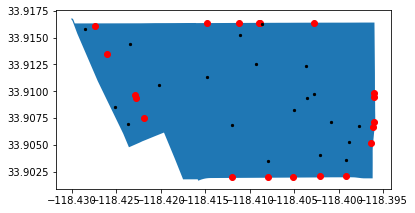

plot exported

Downloaded: 060379800301(1065)_point0_tile0.jpg
Downloaded: 060379800301(1065)_point0_tile1.jpg
Downloaded: 060379800301(1065)_point0_tile2.jpg
Downloaded: 060379800301(1065)_point0_tile3.jpg
Downloaded: 060379800301(1065)_point1_tile0.jpg
Downloaded: 060379800301(1065)_point1_tile1.jpg
Downloaded: 060379800301(1065)_point1_tile2.jpg
Downloaded: 060379800301(1065)_point1_tile3.jpg
Downloaded: 060379800301(1065)_point2_tile0.jpg
Downloaded: 060379800301(1065)_point2_tile1.jpg
Downloaded: 060379800301(1065)_point2_tile2.jpg
Downloaded: 060379800301(1065)_point2_tile3.jpg
Downloaded: 060379800301(1065)_point3_tile0.jpg
Downloaded: 060379800301(1065)_point3_tile1.jpg
Downloaded: 060379800301(1065)_point3_tile2.jpg
Downloaded: 060379800301(1065)_point3_tile3.jpg
Downloaded: 060379800301(1065)_point4_tile0.jpg
Downloaded: 060379800301(1065)_point4_tile1.jpg
Downloaded: 060379800301(1065)_point4_tile2.jpg
Downloaded: 060379800301(1065)_point4_tile3.jpg
Downloaded: 060379800301(

In [ ]:
exportblockgroupdata(1065,1,20) # one example

### Importing and cleaning the statistical data

In [ ]:
import pandas as pd

dirName = root
file = 'ACS_Median_DT5Y2017.B19013_2021-08-09T125946/ACSDT5Y2017.B19013_data_with_overlays_2021-08-09T125943.csv'
missing_values = ["N", "(X)", "-"]
data = pd.read_csv(dirName + file, header=0, skiprows=[1], na_values = missing_values)
data.columns = ['GEOID', 'NAME', 'MEDIAN', 'ERROR']
data

,GEOID,NAME,MEDIAN,ERROR
0,1500000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",75694,19787
1,1500000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",31667,15790
2,1500000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",51950,12060
3,1500000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",86000,19253
4,1500000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",84375,21909
...,...,...,...,...
6420,1500000US060379800311,"Block Group 1, Census Tract 9800.31, Los Angel...",110385,101021
6421,1500000US060379800331,"Block Group 1, Census Tract 9800.33, Los Angel...",NaN,**
6422,1500000US060379901000,"Block Group 0, Census Tract 9901, Los Angeles ...",NaN,**
6423,1500000US060379902000,"Block Group 0, Census Tract 9902, Los Angeles ...",NaN,**


In [ ]:
nulldata = data[data.isnull().any(axis=1)]
nulldata # 185 null values

,GEOID,NAME,MEDIAN,ERROR
28,1500000US060371031024,"Block Group 4, Census Tract 1031.02, Los Angel...",NaN,**
35,1500000US060371034001,"Block Group 1, Census Tract 1034, Los Angeles ...",NaN,**
38,1500000US060371034004,"Block Group 4, Census Tract 1034, Los Angeles ...",NaN,**
82,1500000US060371048101,"Block Group 1, Census Tract 1048.10, Los Angel...",NaN,**
106,1500000US060371064062,"Block Group 2, Census Tract 1064.06, Los Angel...",NaN,**
...,...,...,...,...
6419,1500000US060379800301,"Block Group 1, Census Tract 9800.30, Los Angel...",NaN,**
6421,1500000US060379800331,"Block Group 1, Census Tract 9800.33, Los Angel...",NaN,**
6422,1500000US060379901000,"Block Group 0, Census Tract 9901, Los Angeles ...",NaN,**
6423,1500000US060379902000,"Block Group 0, Census Tract 9902, Los Angeles ...",NaN,**


In [ ]:
miss = data.isnull().any(axis=1)
data[miss] # no null values

,GEOID,NAME,MEDIAN,ERROR
28,1500000US060371031024,"Block Group 4, Census Tract 1031.02, Los Angel...",NaN,**
35,1500000US060371034001,"Block Group 1, Census Tract 1034, Los Angeles ...",NaN,**
38,1500000US060371034004,"Block Group 4, Census Tract 1034, Los Angeles ...",NaN,**
82,1500000US060371048101,"Block Group 1, Census Tract 1048.10, Los Angel...",NaN,**
106,1500000US060371064062,"Block Group 2, Census Tract 1064.06, Los Angel...",NaN,**
...,...,...,...,...
6419,1500000US060379800301,"Block Group 1, Census Tract 9800.30, Los Angel...",NaN,**
6421,1500000US060379800331,"Block Group 1, Census Tract 9800.33, Los Angel...",NaN,**
6422,1500000US060379901000,"Block Group 0, Census Tract 9901, Los Angeles ...",NaN,**
6423,1500000US060379902000,"Block Group 0, Census Tract 9902, Los Angeles ...",NaN,**


In [ ]:
data = data[~miss]
data

,GEOID,NAME,MEDIAN,ERROR
0,1500000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",75694,19787
1,1500000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",31667,15790
2,1500000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",51950,12060
3,1500000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",86000,19253
4,1500000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",84375,21909
...,...,...,...,...
6405,1500000US060379800101,"Block Group 1, Census Tract 9800.10, Los Angel...",11938,5075
6408,1500000US060379800151,"Block Group 1, Census Tract 9800.15, Los Angel...",39516,17812
6410,1500000US060379800191,"Block Group 1, Census Tract 9800.19, Los Angel...",200000,153365
6415,1500000US060379800241,"Block Group 1, Census Tract 9800.24, Los Angel...",121442,53406


In [ ]:
data[data['MEDIAN'].apply(lambda x: x.isnumeric())!=True] # 250,000+ is not numeric and has to be dealt with
# since we are using deciles i can just recode those to 250000

,GEOID,NAME,MEDIAN,ERROR
786,1500000US060371397023,"Block Group 3, Census Tract 1397.02, Los Angel...","250,000+",***
1366,1500000US060372110001,"Block Group 1, Census Tract 2110, Los Angeles ...","250,000+",***
1392,1500000US060372115003,"Block Group 3, Census Tract 2115, Los Angeles ...","250,000+",***
2065,1500000US060372621002,"Block Group 2, Census Tract 2621, Los Angeles ...","250,000+",***
2073,1500000US060372623032,"Block Group 2, Census Tract 2623.03, Los Angel...","250,000+",***
2075,1500000US060372624001,"Block Group 1, Census Tract 2624, Los Angeles ...","250,000+",***
2076,1500000US060372624002,"Block Group 2, Census Tract 2624, Los Angeles ...","250,000+",***
2082,1500000US060372626042,"Block Group 2, Census Tract 2626.04, Los Angel...","250,000+",***
2087,1500000US060372627062,"Block Group 2, Census Tract 2627.06, Los Angel...","250,000+",***
2088,1500000US060372627063,"Block Group 3, Census Tract 2627.06, Los Angel...","250,000+",***


In [ ]:
data.MEDIAN.apply(lambda x: x.isnumeric())

0       True
1       True
2       True
3       True
4       True
        ... 
6405    True
6408    True
6410    True
6415    True
6420    True
Name: MEDIAN, Length: 6240, dtype: bool

In [ ]:
toorich = data.MEDIAN=='250,000+'
data[toorich]

,GEOID,NAME,MEDIAN,ERROR
786,1500000US060371397023,"Block Group 3, Census Tract 1397.02, Los Angel...","250,000+",***
1366,1500000US060372110001,"Block Group 1, Census Tract 2110, Los Angeles ...","250,000+",***
1392,1500000US060372115003,"Block Group 3, Census Tract 2115, Los Angeles ...","250,000+",***
2065,1500000US060372621002,"Block Group 2, Census Tract 2621, Los Angeles ...","250,000+",***
2073,1500000US060372623032,"Block Group 2, Census Tract 2623.03, Los Angel...","250,000+",***
2075,1500000US060372624001,"Block Group 1, Census Tract 2624, Los Angeles ...","250,000+",***
2076,1500000US060372624002,"Block Group 2, Census Tract 2624, Los Angeles ...","250,000+",***
2082,1500000US060372626042,"Block Group 2, Census Tract 2626.04, Los Angel...","250,000+",***
2087,1500000US060372627062,"Block Group 2, Census Tract 2627.06, Los Angel...","250,000+",***
2088,1500000US060372627063,"Block Group 3, Census Tract 2627.06, Los Angel...","250,000+",***


In [ ]:
colu = 'MEDIAN'
data.loc[toorich, colu] = '250000'
data

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,GEOID,NAME,MEDIAN,ERROR
0,1500000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",75694,19787
1,1500000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",31667,15790
2,1500000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",51950,12060
3,1500000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",86000,19253
4,1500000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",84375,21909
...,...,...,...,...
6405,1500000US060379800101,"Block Group 1, Census Tract 9800.10, Los Angel...",11938,5075
6408,1500000US060379800151,"Block Group 1, Census Tract 9800.15, Los Angel...",39516,17812
6410,1500000US060379800191,"Block Group 1, Census Tract 9800.19, Los Angel...",200000,153365
6415,1500000US060379800241,"Block Group 1, Census Tract 9800.24, Los Angel...",121442,53406


In [ ]:
data['deciles_LAC'], bins = pd.qcut(data.MEDIAN.astype('int'), 10, labels=False, retbins=True)
print(data['deciles_LAC'])
data['deciles_LAC'].value_counts()

0       6
1       0
2       3
3       7
4       7
       ..
6405    0
6408    1
6410    9
6415    9
6420    8
Name: deciles_LAC, Length: 6240, dtype: int64


<ipython-input-17-3bb4316b8867>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['deciles_LAC'], bins = pd.qcut(data.MEDIAN.astype('int'), 10, labels=False, retbins=True)


3    628
8    625
1    625
0    624
5    624
6    624
7    624
9    623
2    623
4    620
Name: deciles_LAC, dtype: int64

In [ ]:
bins

array([  5682. ,  32416.9,  40089. ,  46664.3,  53750. ,  62336. ,
        71687.8,  82003. ,  95456.2, 117833. , 250000. ])

In [ ]:
data.loc[:, 'GEO7'] = data.loc[:, 'GEOID'].apply(lambda x: x[9:])
data

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,GEOID,NAME,MEDIAN,ERROR,deciles_LAC,GEO7
0,1500000US060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",75694,19787,6,060371011101
1,1500000US060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",31667,15790,0,060371011102
2,1500000US060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",51950,12060,3,060371011103
3,1500000US060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",86000,19253,7,060371011221
4,1500000US060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",84375,21909,7,060371011222
...,...,...,...,...,...,...
6405,1500000US060379800101,"Block Group 1, Census Tract 9800.10, Los Angel...",11938,5075,0,060379800101
6408,1500000US060379800151,"Block Group 1, Census Tract 9800.15, Los Angel...",39516,17812,1,060379800151
6410,1500000US060379800191,"Block Group 1, Census Tract 9800.19, Los Angel...",200000,153365,9,060379800191
6415,1500000US060379800241,"Block Group 1, Census Tract 9800.24, Los Angel...",121442,53406,9,060379800241


So far the statistical dataset contains the whole LAC. In the next step the names of the pictures, for whose BGs, there is data are collected. That way all the BGs outside the rectangular area are excluded. 

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = root + 'bg_sv_data'
pics = [f for f in listdir(mypath) if isfile(join(mypath, f)) & f.endswith(".jpg")]
pics

['060372693003(489)_point2_tile0.jpg',
 '060372410022(443)_point13_tile1.jpg',
 '060372372023(309)_point5_tile1.jpg',
 '060372213021(63)_point2_tile2.jpg',
 '060377030022(1048)_point13_tile1.jpg',
 '060376030014(906)_point16_tile2.jpg',
 '060372226002(99)_point12_tile2.jpg',
 '060372736003(594)_point8_tile3.jpg',
 '060377028011(1032)_point17_tile0.jpg',
 '060372343004(245)_point3_tile2.jpg',
 '060372240101(102)_point12_tile0.jpg',
 '060377021027(993)_point9_tile0.jpg',
 '060372360003(280)_point6_tile2.jpg',
 '060372426002(466)_point4_tile2.jpg',
 '060376006012(751)_point13_tile1.jpg',
 '060372414002(462)_point8_tile2.jpg',
 '060372392023(368)_point7_tile2.jpg',
 '060376028024(899)_point4_tile2.jpg',
 '060372287101(157)_point13_tile3.jpg',
 '060377022023(1001)_point3_tile3.jpg',
 '060372200004(55)_point18_tile3.jpg',
 '060372674022(469)_point16_tile2.jpg',
 '060376006021(753)_point11_tile3.jpg',
 '060372312201(178)_point6_tile0.jpg',
 '060372313002(181)_point0_tile3.jpg',
 '060375351021

In [ ]:
valid_pics = []
data['inrectangle'] = 0
for pic in pics:
    if pic[0:12] in data.GEO7.values:
        valid_pics.append(pic)
        data.loc[data.GEO7 == pic[0:12],'inrectangle'] = 1

<ipython-input-12-a60e52859a54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['inrectangle'] = 0
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
dirName = root
data[data['inrectangle']==1].to_csv("{}inrectangle_df.csv".format(dirName), index=True, header=True)
data[data['inrectangle']==1]

,GEOID,NAME,MEDIAN,ERROR,deciles_LAC,GEO7,inrectangle
1306,1500000US060372079001,"Block Group 1, Census Tract 2079, Los Angeles ...",102031,43216,8,060372079001,1
1307,1500000US060372079002,"Block Group 2, Census Tract 2079, Los Angeles ...",82993,15527,7,060372079002,1
1545,1500000US060372181102,"Block Group 2, Census Tract 2181.10, Los Angel...",45313,13302,2,060372181102,1
1547,1500000US060372181202,"Block Group 2, Census Tract 2181.20, Los Angel...",44375,33146,2,060372181202,1
1548,1500000US060372181203,"Block Group 3, Census Tract 2181.20, Los Angel...",50301,11886,3,060372181203,1
...,...,...,...,...,...,...,...
6035,1500000US060377032002,"Block Group 2, Census Tract 7032, Los Angeles ...",108017,40786,8,060377032002,1
6036,1500000US060377032003,"Block Group 3, Census Tract 7032, Los Angeles ...",58246,5995,4,060377032003,1
6037,1500000US060377032004,"Block Group 4, Census Tract 7032, Los Angeles ...",118594,35901,9,060377032004,1
6038,1500000US060377032005,"Block Group 5, Census Tract 7032, Los Angeles ...",101786,88748,8,060377032005,1


In [ ]:
print(len(valid_pics)) # 81600 pics
valid_pics = sorted(valid_pics)
valid_pics

81600


['060372079001(0)_point0_tile0.jpg',
 '060372079001(0)_point0_tile1.jpg',
 '060372079001(0)_point0_tile2.jpg',
 '060372079001(0)_point0_tile3.jpg',
 '060372079001(0)_point10_tile0.jpg',
 '060372079001(0)_point10_tile1.jpg',
 '060372079001(0)_point10_tile2.jpg',
 '060372079001(0)_point10_tile3.jpg',
 '060372079001(0)_point11_tile0.jpg',
 '060372079001(0)_point11_tile1.jpg',
 '060372079001(0)_point11_tile2.jpg',
 '060372079001(0)_point11_tile3.jpg',
 '060372079001(0)_point12_tile0.jpg',
 '060372079001(0)_point12_tile1.jpg',
 '060372079001(0)_point12_tile2.jpg',
 '060372079001(0)_point12_tile3.jpg',
 '060372079001(0)_point13_tile0.jpg',
 '060372079001(0)_point13_tile1.jpg',
 '060372079001(0)_point13_tile2.jpg',
 '060372079001(0)_point13_tile3.jpg',
 '060372079001(0)_point14_tile0.jpg',
 '060372079001(0)_point14_tile1.jpg',
 '060372079001(0)_point14_tile2.jpg',
 '060372079001(0)_point14_tile3.jpg',
 '060372079001(0)_point15_tile0.jpg',
 '060372079001(0)_point15_tile1.jpg',
 '060372079001(0

In [ ]:
foureach = []
temp = []

for pic in valid_pics:
    temp.append(pic)
    if len(temp) == 4:
        foureach.append(temp)
        temp = []

print(len(foureach)) # 20400 locations -> 1020 bgs
foureach

20400


[['060372079001(0)_point0_tile0.jpg',
  '060372079001(0)_point0_tile1.jpg',
  '060372079001(0)_point0_tile2.jpg',
  '060372079001(0)_point0_tile3.jpg'],
 ['060372079001(0)_point10_tile0.jpg',
  '060372079001(0)_point10_tile1.jpg',
  '060372079001(0)_point10_tile2.jpg',
  '060372079001(0)_point10_tile3.jpg'],
 ['060372079001(0)_point11_tile0.jpg',
  '060372079001(0)_point11_tile1.jpg',
  '060372079001(0)_point11_tile2.jpg',
  '060372079001(0)_point11_tile3.jpg'],
 ['060372079001(0)_point12_tile0.jpg',
  '060372079001(0)_point12_tile1.jpg',
  '060372079001(0)_point12_tile2.jpg',
  '060372079001(0)_point12_tile3.jpg'],
 ['060372079001(0)_point13_tile0.jpg',
  '060372079001(0)_point13_tile1.jpg',
  '060372079001(0)_point13_tile2.jpg',
  '060372079001(0)_point13_tile3.jpg'],
 ['060372079001(0)_point14_tile0.jpg',
  '060372079001(0)_point14_tile1.jpg',
  '060372079001(0)_point14_tile2.jpg',
  '060372079001(0)_point14_tile3.jpg'],
 ['060372079001(0)_point15_tile0.jpg',
  '060372079001(0)_poin

A small check to see if the 4 tiles match.

In [ ]:
for loc in foureach:
    pic_names = []
    for pic in loc:
        pic_names.append(pic[:-5])
    if len(set(pic_names)) != 1:
        print(loc)

### Taking care of the outcome data

In [ ]:
locations = []
for loc in foureach:
    locations.append(loc[0][:12])

print(len(locations))
locations

20400


['060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079001',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372079002',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102',
 '060372181102

In [ ]:
deciles = []
for loc in locations:
    deciles.append(int(data.deciles_LAC[data.GEO7 == loc].values[0]))

print(len(deciles))
deciles

20400


[8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
medians = []
for loc in locations:
    medians.append(int(data.MEDIAN[data.GEO7 == loc].values[0]))

print(len(medians))
medians

20400


[102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 102031,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 82993,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 45313,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 44375,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 50301,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 48487,
 22472,
 22472,
 224

In [ ]:
pd.Series(deciles).value_counts() # Verteilung der income decile Werte

0    4100
1    3300
2    2480
3    1840
9    1680
4    1540
7    1460
5    1420
8    1360
6    1220
dtype: int64

Do sample checks for 10 obsercations to see if the values match. 

In [ ]:
i = 10000
print(foureach[i])
print(deciles[i])
print(data.loc[data.GEO7 == locations[i], :])

# 10/10 tries successful

['060372703001(518)_point0_tile0.jpg', '060372703001(518)_point0_tile1.jpg', '060372703001(518)_point0_tile2.jpg', '060372703001(518)_point0_tile3.jpg']
4
                      GEOID  \
2208  1500000US060372703001   

                                                   NAME MEDIAN  ERROR  \
2208  Block Group 1, Census Tract 2703, Los Angeles ...  61827  21002   

      deciles_LAC          GEO7  inrectangle  deciles_rect  
2208            4  060372703001            1           6.0  


Onehot-encode deciles.

In [ ]:
dec_onehot = []
for val in deciles:
    row = []
    for i in range(10):
        if i == val:
            row.append(1)
        else:
            row.append(0)
            
    dec_onehot.append(row)
            
print(len(dec_onehot))
dec_onehot

20400


[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0,

### Export all the information as CSV

In [ ]:
dirName = root
pd.DataFrame(foureach).to_csv("{}X.csv".format(dirName), index=False, header=False)
pd.DataFrame(dec_onehot).to_csv("{}Y.csv".format(dirName), index=False, header=False)

In [ ]:
pd.DataFrame(deciles).to_csv("{}Ydeciles.csv".format(dirName), index=False, header=False)

In [ ]:
pd.DataFrame(medians).to_csv("{}Ymedian.csv".format(dirName), index=False, header=False)

In [ ]:
intervall_LAC = pd.qcut(data.MEDIAN.astype('int'), 10, retbins=True)[1]
intervall_rect = pd.qcut(data[data['inrectangle']==1].MEDIAN.astype('int'), 10, retbins=True)[1]
pd.DataFrame({'intervall_LAC': intervall_LAC, 'intervall_rect': intervall_rect})

,intervall_LAC,intervall_rect
0,5682.0,5682.0
1,32416.9,27217.7
2,40089.0,32391.4
3,46664.3,36820.7
4,53750.0,41622.4
5,62336.0,48657.0
6,71687.8,56468.2
7,82003.0,67546.8
8,95456.2,83901.0
9,117833.0,107584.3


# 4 Method

In this section the methodological approach will be decribed, that was used to overcome the previously mentioned challenges. 

Following the approach presented by Suel et al. (2021), we opted to use a with ImageNet-weights pretrained VGG16 to extract features from the images. Similar to Suel et al. (2021) we also chose to chose to feed the four images, that are recorded for every street-level observation, as separate files into the model, as opposed to trying to merge it beforehand. The pictures are preprocessed including normalizing to floats between 0 and 1 and resizing the images to 224 x 224, which is the format preferred by VGG16. The data is fed through four VGG16 models without the dense top layers, after a flatten layer is added, the features come in the form of an array of length 4096. All four arrays go through a number of dense layers that decrease in size and are eventually merged by taking the average. After one more dense layer the final layer will transform the data to a meaningful outcome, differing for every algorithm that is applied. First, we tried to create a big network that consists of the four VGG16s and the dense network. However, with just under half a billion parameters this network would have exceeded our resource constraints and was hence not trained. Instead, as described in Suel et al. (2021), the image data was forward passed through until the first fully connected layer. In order to save time and not to be forced to extract the features every time, we extracted the feature arrays and saved them in CSV format. 

Extending the methodology used by Suel et al. (2021), we framed the problem at hand in three different ways: 
1. Nominal classification problem:
Starting off, the outcome variable is the income deciles from 0 to 9, hence the last layer has 10 nodes. Since there is only one correct class for each observation (location), a softmax activation function is used for the last layer and loss is calculated through categorical crossentropy. The metric used to judge the models performance in this case is the classification accuracy rate, since there is only right or wrong in this situation. 

2. Ordinal classification problem: 
Since the income decile data has a natural order to it, a mere nominal approach on the classification misses out on classification information. When we try to predict dog, cat, horse and donkey, it does not matter, whether the classification was one or three nodes apart from the truth, since it is merely wrong. For ordinal data however, this distinction does matter. Classifiying a location as a 8 when it is a 9 is better than a 1. On order to include this information in our model, we make use of COnsistent RAnk Logits (CORAL) proposed by Cao, Mirjalili, & Raschka (2019). In comparison to merely transforming ordinal targets into binary classification subtasks, the CORAL loss function is rank-monotone and consistent. The model is punished more for further deviation and less for being closer. The performance can now be measured via mean absolute error, which gives an intuitively interpretable estimation for the expected distance in classes. 

3. Regression problem: 
In the third approach we tackle the problem with a regression model. Since income is initially a continuous variable, a regression is suitable. For this it is critical to have only a single node in the last layer without activation. This allows for one single continuous value to be produced and be trained on. The number of possible outcomes is infinite and the outcome can be measured in deviation, such as by calculating the mean absolute error or by classifying the outcomes into the income decile bins, used in the two previous problems. 

Since the VGG16 is central to our feature extraction, it will be presented in more detail in the following:
Regarding the VGG16 model, it was a convolutional neural network (CNN) model that was proposed by Simonyan and Zisserman (2014), the winner of Imagenet 2013. This was one of the most popular models submitted to the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC). In the first five tests of ImageNet, a dataset comprising over 14 million images from 1000 classes, it achieved 92.7% accuracy. Compared to AlexNet an improvement is observed by successively replacing the large kernel filters (11 and 5 in the first and second convolutional layers, respectively) with multiple 3×3 kernel filters. The VGG was invented to improve classification accuracy by increasing the depth of convolutional neural networks. The VGG network is fed with 224 × 224 RGB images. Figure 1 gives an overview of the architecture of the VGG-16 model that we also used for object recognition in our study. The architecture of the VGG-16 is simple and contains only blocks with an incremental number of convolutional layers with filters of size 3x3.  In one configuration, 1×1 convolution filters can also be used, which are generally seen as a linear transformation of the input channels (followed by a non-linearity). The convolution step is fixed at 1 pixel, the spatial filling of the input convolution layer is such that the spatial resolution is preserved after convolution, i.e. the filling is 1 pixel for 3×3 convolution layers. The spatial pooling is performed by five max-pooling layers, which follow some of the convolution layers. He also noted that not all convolution layers are followed by max-pooling. The max-pooling is performed on a 2×2-pixel window, with a step size of 2. There are then three fully connected layers that follow the convolutional layers, the depth of which varies between architectures. The channels of the first two layers are each 4096, the third layer performs an ILSVRC classification of 1000 channels and therefore contains 1000 channels (one for each class). The last layer is the soft-max layer, and the fully connected layers have the same configuration in all networks.

In order to get realistic information of the performance of a model, the model cannot be tested on the data it was trained on. However, leaving out substantial parts of the dataset will likely lead to worse performance and generalization. To overcome this dilemma, statisticians have come up with k-fold cross-validation, which splits the data in k similarly sized parts and trains the model k times using all data, but one part, on which the performance is tested. This way the whole performance is always tested on data that is 'unseen' by the model, while at the same time all the data is used for training. This is usually used for estimating test error providing. The choice of k is a trade-off of variance and bias with larger k being more susceptible to high variance, while low k tends to suffer from higher bias. As proposed in the paper by Suel et al. (2021), we apply 4-fold cross-validation, but not only to get a test error estimate, but to predict the outcome for the whole dataset and plot it on a map. 

## Feature extraction

Since the features are large (3.29GB), we decided to do the feature extraction in 20 batches à 1000 locations (apart from the last 400). 

In [ ]:
!unzip bg_sv_data.zip -d /bg_sv_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drivepics/bg_sv_data/060377022011(994)_point13_tile2.jpg  
  inflating: /content/drivepics/bg_sv_data/060372324005(221)_point2_tile0.jpg  
  inflating: /content/drivepics/bg_sv_data/060372723013(571)_point11_tile0.jpg  
  inflating: /content/drivepics/bg_sv_data/060372410022(443)_point4_tile1.jpg  
  inflating: /content/drivepics/bg_sv_data/060372411101(445)_point8_tile1.jpg  
  inflating: /content/drivepics/bg_sv_data/060377015021(955)_point14_tile1.jpg  
  inflating: /content/drivepics/bg_sv_data/060372400203(404)_point9_tile0.jpg  
  inflating: /content/drivepics/bg_sv_data/060372395012(377)_point10_tile0.jpg  
  inflating: /content/drivepics/bg_sv_data/060376035002(910)_point10_tile3.jpg  
  inflating: /content/drivepics/bg_sv_data/060376201022(928)_point2_tile3.jpg  
  inflating: /content/drivepics/bg_sv_data/060372375001(322)_point9_tile3.jpg  
  inflating: /content/drivepics/bg_sv_data/060372360002(279)_poi

In [ ]:
!ls /bg_sv_data | wc -l

85203


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

X = pd.read_csv("X.csv", header=None)
X

,0,1,2,3
0,060372079001(0)_point0_tile0.jpg,060372079001(0)_point0_tile1.jpg,060372079001(0)_point0_tile2.jpg,060372079001(0)_point0_tile3.jpg
1,060372079001(0)_point10_tile0.jpg,060372079001(0)_point10_tile1.jpg,060372079001(0)_point10_tile2.jpg,060372079001(0)_point10_tile3.jpg
2,060372079001(0)_point11_tile0.jpg,060372079001(0)_point11_tile1.jpg,060372079001(0)_point11_tile2.jpg,060372079001(0)_point11_tile3.jpg
3,060372079001(0)_point12_tile0.jpg,060372079001(0)_point12_tile1.jpg,060372079001(0)_point12_tile2.jpg,060372079001(0)_point12_tile3.jpg
4,060372079001(0)_point13_tile0.jpg,060372079001(0)_point13_tile1.jpg,060372079001(0)_point13_tile2.jpg,060372079001(0)_point13_tile3.jpg
...,...,...,...,...
20395,060377032006(1062)_point5_tile0.jpg,060377032006(1062)_point5_tile1.jpg,060377032006(1062)_point5_tile2.jpg,060377032006(1062)_point5_tile3.jpg
20396,060377032006(1062)_point6_tile0.jpg,060377032006(1062)_point6_tile1.jpg,060377032006(1062)_point6_tile2.jpg,060377032006(1062)_point6_tile3.jpg
20397,060377032006(1062)_point7_tile0.jpg,060377032006(1062)_point7_tile1.jpg,060377032006(1062)_point7_tile2.jpg,060377032006(1062)_point7_tile3.jpg
20398,060377032006(1062)_point8_tile0.jpg,060377032006(1062)_point8_tile1.jpg,060377032006(1062)_point8_tile2.jpg,060377032006(1062)_point8_tile3.jpg


In [ ]:
Y = pd.read_csv("Y.csv", header=None)

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16

def extraction_network():
    vgg16 = VGG16(include_top=True, weights='imagenet', input_shape = (224, 224, 3))
    
    out = vgg16.get_layer('fc1').output
    
    opt = optimizers.Adam(learning_rate=0.001)

    m= models.Model(inputs=vgg16.input, outputs=out)
    m.compile(optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

    return m

In [ ]:
extractor = extraction_network()

553467904/553467096 [==============================] - 9s 0us/step


In [ ]:
import cv2
def pictofeat(path):
    img = cv2.imread(root + 'bg_sv_data/' + path)
    img = cv2.resize(img,(224,224))     # resize image to match model's expected sizing
    img = np.reshape(img,[1,224,224,3])
    feat = extractor.predict(img)
    return feat[0]

In [ ]:
Xlist = X.values.tolist()
len(Xlist)

20400

In [ ]:
from tqdm import tqdm
import os
import csv
def extracttocsv(start,end):
  features = []
  for row in tqdm(Xlist[start:end], unit='it'): #, bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt}" + " [{elapsed}<{remaining}, {rate_noinv_fmt}]"
      rowfeat = []
      for i in range(4):
            rowfeat.append(pictofeat(row[i]))
      features.append(rowfeat)
  print(len(features))
  features = np.array(features)
  print(features.shape)

  filename = root + 'features{}to{}.csv'.format(start,end)
  if os.path.isfile(filename):
      print ("File exists")
      break
      # retrieving data from file.
      with open(filename, 'r') as f:
        reader = csv.reader(f)
        loadedArr = list(reader)
      features = features.tolist()
      with open(filename, 'w', newline='') as csvfile:
          writer = csv.writer(csvfile, delimiter=',')
          writer.writerows(loadedArr)
          writer.writerows(features)
      # saving reshaped array to file.
  else:
      print ("File does not exist")
      features = features.tolist()
      with open(filename, 'w', newline='') as csvfile:
          writer = csv.writer(csvfile, delimiter=',')
          writer.writerows(features)
      
  


In [ ]:
steps = 400
for i in range(20000,20400,steps):
  extracttocsv(i,i+steps)


100%|██████████| 400/400 [02:46<00:00,  2.40it/s]


400
(400, 4, 4096)
File does not exist


# 5 Experimentation

In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from scipy import special

SEED = 20
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

dirCV = root
dirFeat =  root + "features/" 
featCSVlist = []
for file in os.listdir(dirFeat):
    if file.startswith("features") & file.endswith(".csv"):
        featCSVlist.append(file)
featCSVlist = sorted(featCSVlist)

In [ ]:
print('len: ', len(featCSVlist))
featCSVlist

len:  21


['features00000to01000.csv',
 'features01000to02000.csv',
 'features02000to03000.csv',
 'features03000to04000.csv',
 'features04000to05000.csv',
 'features05000to06000.csv',
 'features06000to07000.csv',
 'features07000to08000.csv',
 'features08000to09000.csv',
 'features09000to10000.csv',
 'features10000to11000.csv',
 'features11000to12000.csv',
 'features12000to13000.csv',
 'features13000to14000.csv',
 'features14000to15000.csv',
 'features15000to16000.csv',
 'features16000to17000.csv',
 'features17000to18000.csv',
 'features18000to19000.csv',
 'features19000to20000.csv',
 'features20000to20400.csv']

In [ ]:
def read_featCSV(filename):
    with open(dirFeat + filename, 'r') as f:
      reader = csv.reader(f)
      examples = list(reader)

    X = []
    for row in examples:
        nwrow = []
        for r in row:
            nwrow.append(eval(r))
        X.append(nwrow)
    X = np.array(X)
    print(X.shape)
    return X

In [ ]:
def import_data():
    if os.path.exists(dirCV + "Y.csv"):
        from tqdm import tqdm
        Xcollect = []
        for file in tqdm(featCSVlist):
            Xcollect.append(read_featCSV(file))
        X = np.concatenate((Xcollect), axis=0)
        print('X.shape: {}'.format(X.shape))
        print('X imported')

        Y = pd.read_csv(dirCV + "Y.csv", header=None)
        print('Y imported')
        Y = np.array(Y)
        
        Ymedian = pd.read_csv(dirCV + "Ymedian.csv", header=None)
        print('Ymedian imported')
        Ymedian = np.array(Ymedian).reshape(20400)
        
        print('X.shape: {}'.format(X.shape))
        return X, Y, Ymedian
    else:
        print("Y.csv not found")

In [ ]:
def eval_metric(model, history, metric_name, eps):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, eps + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

In [ ]:
def shuffle_data(seed):
    random_order = np.arange(20400)
    np.random.seed(seed)
    np.random.shuffle(random_order)
    return random_order

In [ ]:
X, Y, Ymedian = import_data()

  5%|▍         | 1/21 [00:23<07:51, 23.55s/it]

(1000, 4, 4096)


 10%|▉         | 2/21 [00:46<07:22, 23.31s/it]

(1000, 4, 4096)


 14%|█▍        | 3/21 [01:09<06:54, 23.01s/it]

(1000, 4, 4096)


 19%|█▉        | 4/21 [01:31<06:27, 22.80s/it]

(1000, 4, 4096)


 24%|██▍       | 5/21 [01:55<06:08, 23.04s/it]

(1000, 4, 4096)


 29%|██▊       | 6/21 [02:18<05:46, 23.11s/it]

(1000, 4, 4096)


 33%|███▎      | 7/21 [02:41<05:23, 23.10s/it]

(1000, 4, 4096)


 38%|███▊      | 8/21 [03:04<04:58, 22.92s/it]

(1000, 4, 4096)


 43%|████▎     | 9/21 [03:27<04:38, 23.18s/it]

(1000, 4, 4096)


 48%|████▊     | 10/21 [03:51<04:15, 23.25s/it]

(1000, 4, 4096)


 52%|█████▏    | 11/21 [04:14<03:51, 23.17s/it]

(1000, 4, 4096)


 57%|█████▋    | 12/21 [04:36<03:26, 22.96s/it]

(1000, 4, 4096)


 62%|██████▏   | 13/21 [04:59<03:03, 22.94s/it]

(1000, 4, 4096)


 67%|██████▋   | 14/21 [05:22<02:41, 23.04s/it]

(1000, 4, 4096)


 71%|███████▏  | 15/21 [05:46<02:18, 23.06s/it]

(1000, 4, 4096)


 76%|███████▌  | 16/21 [06:08<01:54, 22.95s/it]

(1000, 4, 4096)


 81%|████████  | 17/21 [06:31<01:31, 22.80s/it]

(1000, 4, 4096)


 86%|████████▌ | 18/21 [06:54<01:08, 22.82s/it]

(1000, 4, 4096)


 90%|█████████ | 19/21 [07:16<00:45, 22.70s/it]

(1000, 4, 4096)


 95%|█████████▌| 20/21 [07:39<00:22, 22.78s/it]

(1000, 4, 4096)


100%|██████████| 21/21 [07:48<00:00, 22.31s/it]

(400, 4, 4096)


X.shape: (20400, 4, 4096)
X imported
Y imported
Ymedian imported
X.shape: (20400, 4, 4096)


Decoded version of Y for the ordinal classification model. 

In [ ]:
Ydec = np.argmax(Y, axis=1)
Ydec

array([8, 8, 8, ..., 8, 8, 8])

In [ ]:
random_order = shuffle_data(SEED)

## Nominal Classification

In [ ]:
def fourfold_nom(randomize):
    randomize = list(randomize)
    if len(randomize) == 20400:
        k = 4
        fourth = int(len(randomize) / k)
        df = pd.DataFrame({'{}-fold_nom_pred'.format(k): np.array([]).astype(int)})
        predictions = []
        Ytestarray = []
        randomtestarray = []
        acc_overall = []
        acc_dec = []
        print(df)
        for i in range(k):
            test = np.array(randomize[i*fourth:i*fourth+fourth])
            train = np.array(randomize[:i*fourth] + randomize[(i+1)*fourth:])
            
            X_train = X[train,:,:]
            X_test = X[test,:,:]
            print(X_train.shape)
            print(X_test.shape)
            
            Y_train = Y[train,]
            Y_test = Y[test,]
            print(Y_train.shape)
            print(Y_test.shape)
            
            Xdict_train = {"i1": X_train[:,0,], "i2": X_train[:,1,], "i3": X_train[:,2,], "i4": X_train[:,3,]}
            Xdict_test = {"i1": X_test[:,0,], "i2": X_test[:,1,], "i3": X_test[:,2,], "i4": X_test[:,3,]}
            
            modelpath = dirCV + 'models/best_nom_fold{}'.format(i+1)
            callback = tf.keras.callbacks.ModelCheckpoint(
                filepath=modelpath,
                save_weights_only=False,
                monitor='val_accuracy',
                mode='max',
                save_best_only=True)

            history = nom_model.fit(x=Xdict_train, y=Y_train, batch_size=batch, epochs=epos, validation_split=0.1, callbacks=callback)
            best_nom_model = tf.keras.models.load_model(modelpath)
            eval_metric(best_nom_model, history, metr, epos)
            
            pred = best_nom_model.predict(Xdict_test)
            predmax = tf.argmax(pred, axis=1)
            predmax_oh = tf.one_hot(predmax, depth = 10)

            print('Overall accuracy of fold {}: {}'.format(i+1, str(accuracy_score(Y_test, predmax_oh))))
            acc_overall.append(accuracy_score(Y_test, predmax_oh))
            for j in range(10):
                print('Accuracy Decile {} of fold {}: {}'.format(j, i+1, str(accuracy_score(np.array(Y_test)[np.array(predmax_oh)[:,j] == 1], np.array(predmax_oh)[np.array(predmax_oh)[:,j] == 1]))))
                temp = []
                temp.append(accuracy_score(np.array(Y_test)[np.array(predmax_oh)[:,j] == 1], np.array(predmax_oh)[np.array(predmax_oh)[:,j] == 1]))
                acc_dec.append(temp)
            df_app = pd.DataFrame({'{}-fold_nom_pred'.format(k): np.array(predmax).astype(int)}, index=test)
            df = df.append(df_app)
            print(df)
            
        print('OVERALL MEAN ACCURACY: {}'.format(np.array(acc_overall).mean()))
        for f in range(10):
            print('DECILE {} MEAN ACCURACY: {}'.format(f, np.array(acc_dec[f]).mean()))
            
        return df, acc_overall, acc_dec
    else:
        print('len of 20400 expected; got len of ' + str(len(randomize)))

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers

def nominal_classification_model(drop_rate1, drop_rate2, reg_rate):
    input_layer1 = layers.Input(shape=(4096), name='i1')
    input_layer2 = layers.Input(shape=(4096), name='i2')
    input_layer3 = layers.Input(shape=(4096), name='i3')
    input_layer4 = layers.Input(shape=(4096), name='i4')
    
    dense21 = layers.Dropout(drop_rate1) (input_layer1)
    dense22 = layers.Dropout(drop_rate1) (input_layer2)
    dense23 = layers.Dropout(drop_rate1) (input_layer3)
    dense24 = layers.Dropout(drop_rate1) (input_layer4)
    
    dense21 = layers.Dense(1024, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense22 = layers.Dense(1024, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense23 = layers.Dense(1024, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense24 = layers.Dense(1024, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense21)
    dense22 = layers.Dropout(drop_rate2) (dense22)
    dense23 = layers.Dropout(drop_rate2) (dense23)
    dense24 = layers.Dropout(drop_rate2) (dense24)
    
    dense31 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense32 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense33 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense34 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense31)
    dense22 = layers.Dropout(drop_rate2) (dense32)
    dense23 = layers.Dropout(drop_rate2) (dense33)
    dense24 = layers.Dropout(drop_rate2) (dense34)
    
    dense41 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense31)
    dense42 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense32)
    dense43 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense33)
    dense44 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense34)

    ave = layers.Average() ([dense41, dense42, dense43, dense44])
    
    final_dense = layers.Dense(64, activation='relu') (ave)
    
    output_layer = layers.Dense(10, activation="softmax") (final_dense) 
    
    m = models.Model([input_layer1, input_layer2, input_layer3, input_layer4], output_layer)
    m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 
    
    return m

nom_model = nominal_classification_model(0.3,0.5,0.001)
print(nom_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i1 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i2 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i3 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i4 (InputLayer)                 [(None, 4096)]       0                                            
______________________________________________________________________________________________

Empty DataFrame
Columns: [4-fold_nom_pred]
Index: []
(15300, 4, 4096)
(5100, 4, 4096)
(15300, 10)
(5100, 10)
Epoch 1/10
4/4 [==============================] - 17s 3s/step - loss: 14.1989 - accuracy: 0.1317 - val_loss: 13.5116 - val_accuracy: 0.0948
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold1/assets
Epoch 2/10
4/4 [==============================] - 15s 4s/step - loss: 12.7569 - accuracy: 0.1282 - val_loss: 11.2225 - val_accuracy: 0.1830
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold1/assets
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 11.0986 - accuracy: 0.1519 - val_loss: 9.6585 - val_accuracy: 0.2026
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold1/assets
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 9.7253 - accuracy: 0.1807 - val_loss: 9.0214 - val_accuracy: 0.1817
Epoch 5/10
4/4 [==============================] - 16s 4s/step - loss: 9.0072 - accuracy: 0.125

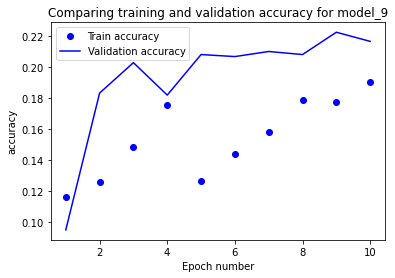

Overall accuracy of fold 1: 0.21764705882352942
Accuracy Decile 0 of fold 1: 0.2070323488045007
Accuracy Decile 1 of fold 1: 0.2914653784219002
Accuracy Decile 2 of fold 1: nan
Accuracy Decile 3 of fold 1: 0.0
Accuracy Decile 4 of fold 1: 0.0
Accuracy Decile 5 of fold 1: nan
Accuracy Decile 6 of fold 1: 0.13253012048192772
Accuracy Decile 7 of fold 1: nan
Accuracy Decile 8 of fold 1: nan
Accuracy Decile 9 of fold 1: 0.2169249106078665
       4-fold_nom_pred
3267                 0
9092                 0
17756                0
9072                 0
349                  0
...                ...
4569                 0
19575                0
11131                0
11369                0
8033                 0

[5100 rows x 1 columns]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid va

(15300, 4, 4096)
(5100, 4, 4096)
(15300, 10)
(5100, 10)
Epoch 1/10
4/4 [==============================] - 17s 4s/step - loss: 6.8630 - accuracy: 0.1898 - val_loss: 6.6665 - val_accuracy: 0.2242
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold2/assets
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 6.6383 - accuracy: 0.1948 - val_loss: 6.4645 - val_accuracy: 0.2183
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 6.4399 - accuracy: 0.2004 - val_loss: 6.2741 - val_accuracy: 0.2346
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold2/assets
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 6.2512 - accuracy: 0.2028 - val_loss: 6.1006 - val_accuracy: 0.2281
Epoch 5/10
4/4 [==============================] - 16s 4s/step - loss: 6.0720 - accuracy: 0.2094 - val_loss: 5.9351 - val_accuracy: 0.2314
Epoch 6/10
4/4 [==============================] - 16s 4s/step - loss: 5.9147 - accuracy: 0.211

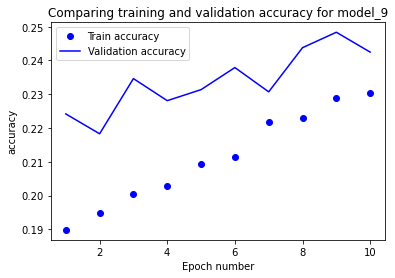

Overall accuracy of fold 2: 0.23568627450980392
Accuracy Decile 0 of fold 2: 0.23020483032711708
Accuracy Decile 1 of fold 2: 0.2838095238095238
Accuracy Decile 2 of fold 2: 0.5
Accuracy Decile 3 of fold 2: nan
Accuracy Decile 4 of fold 2: 0.2608695652173913
Accuracy Decile 5 of fold 2: nan
Accuracy Decile 6 of fold 2: 0.0
Accuracy Decile 7 of fold 2: 0.14785992217898833
Accuracy Decile 8 of fold 2: nan
Accuracy Decile 9 of fold 2: 0.24975514201762977
       4-fold_nom_pred
3267                 0
9092                 0
17756                0
9072                 0
349                  0
...                ...
17443                0
12376                0
3461                 0
9989                 0
11966                0

[10200 rows x 1 columns]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid va

(15300, 4, 4096)
(5100, 4, 4096)
(15300, 10)
(5100, 10)
Epoch 1/10
4/4 [==============================] - 18s 4s/step - loss: 5.2374 - accuracy: 0.2370 - val_loss: 5.1477 - val_accuracy: 0.2556
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold3/assets
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 5.1248 - accuracy: 0.2307 - val_loss: 5.0408 - val_accuracy: 0.2601
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold3/assets
Epoch 3/10
4/4 [==============================] - 17s 4s/step - loss: 5.0179 - accuracy: 0.2455 - val_loss: 4.9457 - val_accuracy: 0.2556
Epoch 4/10
4/4 [==============================] - 17s 4s/step - loss: 4.9147 - accuracy: 0.2455 - val_loss: 4.8450 - val_accuracy: 0.2654
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold3/assets
Epoch 5/10
4/4 [==============================] - 16s 4s/step - loss: 4.8157 - accuracy: 0.2475 - val_loss: 4.7626 - val_accuracy: 0.2556
Epoch 6/10
4/4

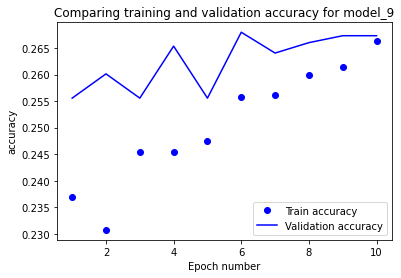

Overall accuracy of fold 3: 0.27215686274509804
Accuracy Decile 0 of fold 3: 0.27080226662690127
Accuracy Decile 1 of fold 3: 0.34782608695652173
Accuracy Decile 2 of fold 3: 0.3
Accuracy Decile 3 of fold 3: 0.6666666666666666
Accuracy Decile 4 of fold 3: 0.24778761061946902
Accuracy Decile 5 of fold 3: 0.0
Accuracy Decile 6 of fold 3: nan
Accuracy Decile 7 of fold 3: 0.191699604743083
Accuracy Decile 8 of fold 3: 0.0
Accuracy Decile 9 of fold 3: 0.3068432671081678
       4-fold_nom_pred
3267                 0
9092                 0
17756                0
9072                 0
349                  0
...                ...
4195                 0
19362                7
16391                9
4925                 0
17265                0

[15300 rows x 1 columns]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(15300, 4, 4096)
(5100, 4, 4096)
(15300, 10)
(5100, 10)
Epoch 1/10
4/4 [==============================] - 18s 4s/step - loss: 4.3334 - accuracy: 0.2686 - val_loss: 4.2684 - val_accuracy: 0.2797
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold4/assets
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 4.2624 - accuracy: 0.2640 - val_loss: 4.2157 - val_accuracy: 0.2725
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 4.1983 - accuracy: 0.2711 - val_loss: 4.1445 - val_accuracy: 0.2797
Epoch 4/10
4/4 [==============================] - 17s 4s/step - loss: 4.1331 - accuracy: 0.2744 - val_loss: 4.0921 - val_accuracy: 0.2869
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold4/assets
Epoch 5/10
4/4 [==============================] - 16s 4s/step - loss: 4.0701 - accuracy: 0.2771 - val_loss: 4.0338 - val_accuracy: 0.2876
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_nom_fold4/assets
Epoch 6/10
4/4

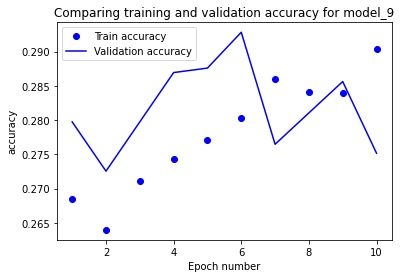

Overall accuracy of fold 4: 0.27980392156862743
Accuracy Decile 0 of fold 4: 0.3025502318392581
Accuracy Decile 1 of fold 4: 0.30179028132992325
Accuracy Decile 2 of fold 4: 0.25
Accuracy Decile 3 of fold 4: 0.27631578947368424
Accuracy Decile 4 of fold 4: 0.2608695652173913
Accuracy Decile 5 of fold 4: 0.3142857142857143
Accuracy Decile 6 of fold 4: 0.29411764705882354
Accuracy Decile 7 of fold 4: 0.1717171717171717
Accuracy Decile 8 of fold 4: 0.13333333333333333
Accuracy Decile 9 of fold 4: 0.29721669980119286
       4-fold_nom_pred
3267                 0
9092                 0
17756                0
9072                 0
349                  0
...                ...
1607                 9
3915                 0
14729                0
4367                 1
15715                1

[20400 rows x 1 columns]
OVERALL MEAN ACCURACY: 0.2513235294117647
DECILE 0 MEAN ACCURACY: 0.2070323488045007
DECILE 1 MEAN ACCURACY: 0.2914653784219002
DECILE 2 MEAN ACCURACY: nan
DECILE 3 MEAN ACCURACY:

,4-fold_nom_pred
3267,0
9092,0
17756,0
9072,0
349,0
...,...
1607,9
3915,0
14729,0
4367,1


In [ ]:
batch = 4096
epos = 10
metr = 'accuracy'

df_nom, nom_acc, nom_acc_dec = fourfold_nom(random_order)

print(nom_acc)
print(nom_acc_dec)
df_nom

In [ ]:
for i in range(20400):
    if len(df_nom.loc[i,:]) != 1:
        print(i)

In [ ]:
dfs_nom = df_nom.sort_index()

dec_pred = np.array(dfs_nom.iloc[:,0]).reshape(20400,).astype(int)

print(len(dec_pred))
dec_pred

dec_bg_mean = []

for i in range(1020):
    start = i * 20
    dec_bg_mean.append(round(dec_pred[start : start + 20].mean()))
print(len(dec_bg_mean))
print(np.bincount(dec_bg_mean))

dec_bg_fre = []
for i in range(1020):
    start = i * 20
    dec_bg_fre.append(np.bincount(dec_pred[start : start + 20]).argmax())
print(len(dec_bg_fre))
print(np.bincount(dec_bg_fre))

20400
1020
[276 230 125  98  84  74  66  40  19   8]
1020
[827   9   0   0   0   0   0  18   0 166]


20400
1020
[114 187 192  77 111  60  88  67  75  49]
1020
[233 134 138  80 116  54  52  37  57 119]

In [ ]:
pd.Series(dec_bg_mean).to_csv("{}nominal_predictions_mean.csv".format(dirCV))

pd.Series(dec_bg_fre).to_csv("{}nominal_predictions_fre.csv".format(dirCV))

## Ordinal Classification

This version of coral is needed for the ordinal classification model. The normal stable version is deprecated and does not work.

In [ ]:
!pip install git+https://github.com/ck37/coral-ordinal/

  Cloning https://github.com/ck37/coral-ordinal/ to /private/var/folders/_p/dlj9jzk57hq65xsw51fcj6hc0000gn/T/pip-req-build-8ifmoprp
  Running command git clone -q https://github.com/ck37/coral-ordinal/ /private/var/folders/_p/dlj9jzk57hq65xsw51fcj6hc0000gn/T/pip-req-build-8ifmoprp


In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers
import coral_ordinal as coral

def ordinal_classification_model(drop_rate1, drop_rate2, reg_rate):
    
    input_layer1 = layers.Input(shape=(4096), name='i1')
    input_layer2 = layers.Input(shape=(4096), name='i2')
    input_layer3 = layers.Input(shape=(4096), name='i3')
    input_layer4 = layers.Input(shape=(4096), name='i4')
    
    dense21 = layers.Dropout(drop_rate1) (input_layer1)
    dense22 = layers.Dropout(drop_rate1) (input_layer2)
    dense23 = layers.Dropout(drop_rate1) (input_layer3)
    dense24 = layers.Dropout(drop_rate1) (input_layer4)
    
    dense21 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense22 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense23 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense24 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense21)
    dense22 = layers.Dropout(drop_rate2) (dense22)
    dense23 = layers.Dropout(drop_rate2) (dense23)
    dense24 = layers.Dropout(drop_rate2) (dense24)
    
    dense31 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense32 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense33 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense34 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense31)
    dense22 = layers.Dropout(drop_rate2) (dense32)
    dense23 = layers.Dropout(drop_rate2) (dense33)
    dense24 = layers.Dropout(drop_rate2) (dense34)
    
    dense41 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense31)
    dense42 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense32)
    dense43 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense33)
    dense44 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense34)

    ave = layers.Average() ([dense41, dense42, dense43, dense44])
    
    final_dense = layers.Dense(64, activation='relu') (ave)
    
    output_layer = coral.CoralOrdinal(10) (final_dense)
    
    m = models.Model([input_layer1, input_layer2, input_layer3, input_layer4], output_layer)
    adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    m.compile(loss= coral.OrdinalCrossEntropy(num_classes = 10), optimizer=adam, metrics='mean_absolute_error') # binary cross entropy is log loss # metrics = [coral.MeanAbsoluteErrorLabels()]
    
    return m

ord_model = ordinal_classification_model(0.3,0.5,0.001)
print(ord_model.summary())

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i1 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i2 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i3 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i4 (InputLayer)                 [(None, 4096)]       0                                            
____________________________________________________________________________________________

The following function uses code as provided by the authors of the CORAL tensorflow implementation (https://github.com/ck37/coral-ordinal/)

In [ ]:
def fourfold_ord(randomize):
    randomize = list(randomize)
    if len(randomize) == 20400:
        k = 4
        fourth = int(len(randomize) / k)
        df = pd.DataFrame({'{}-fold_ord_pred1'.format(k): np.array([]).astype(int), '{}-fold_ord_pred2'.format(k): np.array([]).astype(int)})
        predictions = []
        Ytestarray = []
        randomtestarray = []
        mae_overall = []
        mae_dec = []
        print(df)
        for i in range(k):
            test = np.array(randomize[i*fourth:i*fourth+fourth])
            train = np.array(randomize[:i*fourth] + randomize[(i+1)*fourth:])
            
            X_train = X[train,:,:]
            X_test = X[test,:,:]
            print(X_train.shape)
            print(X_test.shape)
            
            Y_train = Ydec[train]
            Y_test = Ydec[test]
            print(Y_train.shape)
            print(Y_test.shape)
            
            Xdict_train = {"i1": X_train[:,0,], "i2": X_train[:,1,], "i3": X_train[:,2,], "i4": X_train[:,3,]}
            Xdict_test = {"i1": X_test[:,0,], "i2": X_test[:,1,], "i3": X_test[:,2,], "i4": X_test[:,3,]}
            
            modelpath = dirCV + 'models/best_ord_fold{}'.format(i+1)
#             callback = tf.keras.callbacks.ModelCheckpoint(
#                 filepath=modelpath,
#                 save_weights_only=False,
#                 monitor='val_mean_absolute_error',
#                 mode='min',
#                 save_best_only=True)

            history = ord_model.fit(x=Xdict_train, y=Y_train, batch_size=batch, epochs=epos, validation_split=0.1)
            best_ord_model = tf.keras.models.load_model(modelpath, compile=False)
            eval_metric(best_ord_model, history, metr, epos)
            
            ordinal_logits = best_ord_model.predict(Xdict_test)
            tensor_probs = coral.ordinal_softmax(ordinal_logits)
            probs_df = pd.DataFrame(tensor_probs.numpy())
            
            # Probs to labels
            labels = probs_df.idxmax(axis = 1)
            labels.values

            Y_test = pd.Series(Y_test)

            # What is our accuracy? Around 64%.
            print(np.mean(labels == Y_test))

            print(mean_absolute_error(labels, Y_test))
            
            cum_probs = pd.DataFrame(ordinal_logits).apply(special.expit)
            labels2 = cum_probs.apply(lambda x: x > 0.5).sum(axis = 1)

            # What is the accuracy of these labels? About 66%.
            print(np.mean(labels2 == Y_test))
            print(mean_absolute_error(labels2, Y_test))
            
            # More often than not these are the same, but still a lot of discrepancy.
            print(np.mean(labels == labels2))

            print("Mean absolute label error version 1:", np.mean(np.abs(labels - Y_test)))
            print("Mean absolute label error version 2:", np.mean(np.abs(labels2 - Y_test)))

            df_app = pd.DataFrame({'{}-fold_ord_pred1'.format(k): np.array(labels).astype(int), '{}-fold_ord_pred2'.format(k): np.array(labels2).astype(int)}, index=test)
            df = df.append(df_app)
            print(df)
            
        return df, mae_overall, mae_dec
    else:
        print('len of 20400 expected; got len of ' + str(len(randomize)))

In [ ]:
tf.config.run_functions_eagerly(True)

Empty DataFrame
Columns: [4-fold_ord_pred1, 4-fold_ord_pred2]
Index: []
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
4/4 [==============================] - 26s 6s/step - loss: 13.9314 - mean_absolute_error: 4.5829 - val_loss: 12.1456 - val_mean_absolute_error: 3.3555
Epoch 2/5
4/4 [==============================] - 26s 6s/step - loss: 12.8547 - mean_absolute_error: 3.4202 - val_loss: 11.9374 - val_mean_absolute_error: 4.6330
Epoch 3/5
4/4 [==============================] - 26s 6s/step - loss: 12.1497 - mean_absolute_error: 4.5458 - val_loss: 11.4775 - val_mean_absolute_error: 4.2260
Epoch 4/5
4/4 [==============================] - 25s 6s/step - loss: 11.7201 - mean_absolute_error: 4.0304 - val_loss: 11.4610 - val_mean_absolute_error: 3.6344
Epoch 5/5
4/4 [==============================] - 24s 6s/step - loss: 11.7060 - mean_absolute_error: 3.6732 - val_loss: 11.2844 - val_mean_absolute_error: 4.0746


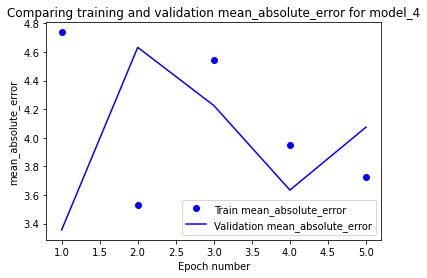

0.22607843137254902
3.18921568627451
0.22647058823529412
3.1841176470588235
0.9980392156862745
Mean absolute label error version 1: 3.18921568627451
Mean absolute label error version 2: 3.1841176470588235
       4-fold_ord_pred1  4-fold_ord_pred2
3267                  0                 0
9092                  9                 9
17756                 0                 0
9072                  0                 0
349                   9                 9
...                 ...               ...
4569                  0                 0
19575                 9                 9
11131                 9                 9
11369                 0                 0
8033                  0                 0

[5100 rows x 2 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
4/4 [==============================] - 28s 6s/step - loss: 11.4944 - mean_absolute_error: 4.1579 - val_loss: 11.2690 - val_mean_absolute_error: 4.1810
Epoch 2/5
4/4 [==============================] - 26s 6s/step - loss: 11.4243 - mean_absolute_error: 4.1262 - val_loss: 11.1661 - val_mean_absolute_error: 3.9007
Epoch 3/5
4/4 [==============================] - 25s 6s/step - loss: 11.3539 - mean_absolute_error: 3.8605 - val_loss: 11.1154 - val_mean_absolute_error: 3.8884
Epoch 4/5
4/4 [==============================] - 25s 6s/step - loss: 11.2744 - mean_absolute_error: 3.9444 - val_loss: 11.0667 - val_mean_absolute_error: 4.0790
Epoch 5/5
4/4 [==============================] - 24s 6s/step - loss: 11.1955 - mean_absolute_error: 4.1007 - val_loss: 11.0113 - val_mean_absolute_error: 4.0678


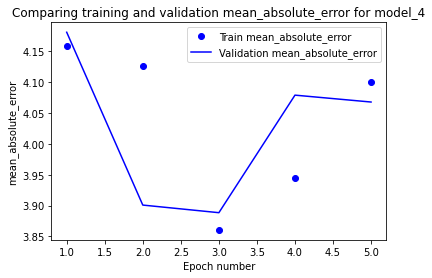

0.24294117647058824
2.8058823529411763
0.24333333333333335
2.7949019607843137
0.9933333333333333
Mean absolute label error version 1: 2.8058823529411763
Mean absolute label error version 2: 2.7949019607843137
       4-fold_ord_pred1  4-fold_ord_pred2
3267                  0                 0
9092                  9                 9
17756                 0                 0
9072                  0                 0
349                   9                 9
...                 ...               ...
17443                 0                 0
12376                 9                 9
3461                  0                 0
9989                  9                 9
11966                 0                 0

[10200 rows x 2 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
4/4 [==============================] - 27s 6s/step - loss: 11.1600 - mean_absolute_error: 3.9936 - val_loss: 10.9532 - val_mean_absolute_error: 3.9669
Epoch 2/5
4/4 [==============================] - 25s 6s/step - loss: 11.1232 - mean_absolute_error: 3.9302 - val_loss: 10.9078 - val_mean_absolute_error: 4.0367
Epoch 3/5
4/4 [==============================] - 25s 6s/step - loss: 11.0681 - mean_absolute_error: 4.0248 - val_loss: 10.8759 - val_mean_absolute_error: 4.1103
Epoch 4/5
4/4 [==============================] - 24s 6s/step - loss: 10.9956 - mean_absolute_error: 4.0327 - val_loss: 10.8182 - val_mean_absolute_error: 4.0164
Epoch 5/5
4/4 [==============================] - 24s 6s/step - loss: 10.9798 - mean_absolute_error: 3.9685 - val_loss: 10.7767 - val_mean_absolute_error: 4.0484


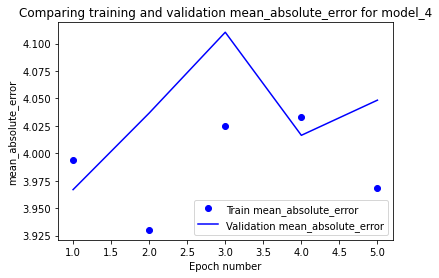

0.2550980392156863
2.5688235294117647
0.2550980392156863
2.5550980392156863
0.9925490196078431
Mean absolute label error version 1: 2.5688235294117647
Mean absolute label error version 2: 2.5550980392156863
       4-fold_ord_pred1  4-fold_ord_pred2
3267                  0                 0
9092                  9                 9
17756                 0                 0
9072                  0                 0
349                   9                 9
...                 ...               ...
4195                  0                 0
19362                 9                 9
16391                 9                 9
4925                  0                 0
17265                 0                 0

[15300 rows x 2 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/5
4/4 [==============================] - 28s 6s/step - loss: 10.9317 - mean_absolute_error: 4.0319 - val_loss: 10.6644 - val_mean_absolute_error: 3.9779
Epoch 2/5
4/4 [==============================] - 25s 6s/step - loss: 10.9070 - mean_absolute_error: 4.0222 - val_loss: 10.6289 - val_mean_absolute_error: 3.9438
Epoch 3/5
4/4 [==============================] - 24s 6s/step - loss: 10.8534 - mean_absolute_error: 4.0191 - val_loss: 10.5944 - val_mean_absolute_error: 3.9600
Epoch 4/5
4/4 [==============================] - 23s 6s/step - loss: 10.8130 - mean_absolute_error: 4.0224 - val_loss: 10.5634 - val_mean_absolute_error: 3.9186
Epoch 5/5
4/4 [==============================] - 23s 6s/step - loss: 10.7810 - mean_absolute_error: 4.0143 - val_loss: 10.5257 - val_mean_absolute_error: 3.9266


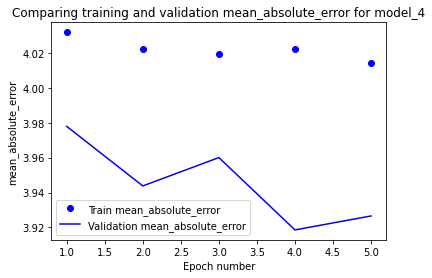

0.24980392156862746
2.4980392156862745
0.2503921568627451
2.473921568627451
0.9888235294117647
Mean absolute label error version 1: 2.4980392156862745
Mean absolute label error version 2: 2.473921568627451
       4-fold_ord_pred1  4-fold_ord_pred2
3267                  0                 0
9092                  9                 9
17756                 0                 0
9072                  0                 0
349                   9                 9
...                 ...               ...
1607                  9                 9
3915                  0                 0
14729                 0                 0
4367                  0                 0
15715                 0                 0

[20400 rows x 2 columns]
[]
[]


,4-fold_ord_pred1,4-fold_ord_pred2
3267,0,0
9092,9,9
17756,0,0
9072,0,0
349,9,9
...,...,...
1607,9,9
3915,0,0
14729,0,0
4367,0,0


In [ ]:
batch = 4096
epos = 5
metr = 'mean_absolute_error'

df_ord, ord_mae, ord_mae_dec = fourfold_ord(random_order)

print(ord_mae)
print(ord_mae_dec)
df_ord

In [ ]:
dfs_ord = df_ord.sort_index()

dec_pred = np.array(dfs_ord.iloc[:,1]).reshape(20400,).astype(int)

print(len(dec_pred))
dec_pred

dec_bg_mean = []

for i in range(1020):
    start = i * 20
    dec_bg_mean.append(round(dec_pred[start : start + 20].mean()))
print(len(dec_bg_mean))
print(np.bincount(dec_bg_mean))

dec_bg_fre = []
for i in range(1020):
    start = i * 20
    dec_bg_fre.append(np.bincount(dec_pred[start : start + 20]).argmax())
print(len(dec_bg_fre))
print(np.bincount(dec_bg_fre))

20400
1020
[243 163 118  89  87  69  90  61  71  29]
1020
[700   0   0   0   0   0   0   0   0 320]


20400
1020
[344 113 101  53  46  44  63  80  99  77]
1020
[655   0   0   0   0   0   0   0   0 365]

In [ ]:
pd.Series(dec_bg_mean).to_csv("{}ordinal_predictions_mean.csv".format(dirCV))

pd.Series(dec_bg_fre).to_csv("{}ordinal_predictions_fre.csv".format(dirCV))

## Regression

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers

def regression_model(drop_rate1, drop_rate2, reg_rate):
    
    input_layer1 = layers.Input(shape=(4096), name='i1')
    input_layer2 = layers.Input(shape=(4096), name='i2')
    input_layer3 = layers.Input(shape=(4096), name='i3')
    input_layer4 = layers.Input(shape=(4096), name='i4')
    
    dense21 = layers.Dropout(drop_rate1) (input_layer1)
    dense22 = layers.Dropout(drop_rate1) (input_layer2)
    dense23 = layers.Dropout(drop_rate1) (input_layer3)
    dense24 = layers.Dropout(drop_rate1) (input_layer4)
    
    dense21 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense22 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense23 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense24 = layers.Dense(512, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense21)
    dense22 = layers.Dropout(drop_rate2) (dense22)
    dense23 = layers.Dropout(drop_rate2) (dense23)
    dense24 = layers.Dropout(drop_rate2) (dense24)
    
    dense31 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense21)
    dense32 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense22)
    dense33 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense23)
    dense34 = layers.Dense(256, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense24)
    
    dense21 = layers.Dropout(drop_rate2) (dense31)
    dense22 = layers.Dropout(drop_rate2) (dense32)
    dense23 = layers.Dropout(drop_rate2) (dense33)
    dense24 = layers.Dropout(drop_rate2) (dense34)
    
    dense41 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense31)
    dense42 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense32)
    dense43 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense33)
    dense44 = layers.Dense(128, kernel_regularizer=regularizers.l2(reg_rate),  activation="relu") (dense34)

    ave = layers.Average() ([dense41, dense42, dense43, dense44])
    
    final_dense = layers.Dense(64, activation='relu') (ave)
    
    output_layer = layers.Dense(1) (final_dense)
    
    m = models.Model([input_layer1, input_layer2, input_layer3, input_layer4], output_layer)
    m.compile(loss="mean_squared_error", optimizer=optimizers.Adam(learning_rate=1e-01), metrics=["mean_absolute_error"]) # binary cross entropy is log loss
    
    return m

reg_model = regression_model(0,0,0)
print(reg_model.summary())



Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i1 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i2 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i3 (InputLayer)                 [(None, 4096)]       0                                            
__________________________________________________________________________________________________
i4 (InputLayer)                 [(None, 4096)]       0                                            
____________________________________________________________________________________________

In [ ]:
def fourfold_reg(randomize):
    randomize = list(randomize)
    if len(randomize) == 20400:
        k = 4
        fourth = int(len(randomize) / k)
        df = pd.DataFrame({'{}-fold_reg_pred'.format(k): np.array([])})
        predictions = []
        Ytestarray = []
        randomtestarray = []
        mae_overall = []
        print(df)
        for i in range(k):
            test = np.array(randomize[i*fourth:i*fourth+fourth])
            train = np.array(randomize[:i*fourth] + randomize[(i+1)*fourth:])
            
            X_train = X[train,:,:]
            X_test = X[test,:,:]
            print(X_train.shape)
            print(X_test.shape)
            
            Y_train = Ymedian[train]
            Y_test = Ymedian[test]
            print(Y_train.shape)
            print(Y_test.shape)
            print(Y_test)
            
            Xdict_train = {"i1": X_train[:,0,], "i2": X_train[:,1,], "i3": X_train[:,2,], "i4": X_train[:,3,]}
            Xdict_test = {"i1": X_test[:,0,], "i2": X_test[:,1,], "i3": X_test[:,2,], "i4": X_test[:,3,]}
            
            modelpath = dirCV + 'models/best_reg_fold{}'.format(i+1)
            callback = tf.keras.callbacks.ModelCheckpoint(
                filepath=modelpath,
                save_weights_only=False,
                monitor='val_mean_absolute_error',
                mode='min',
                save_best_only=True)

            history = reg_model.fit(x=Xdict_train, y=Y_train, batch_size=batch, epochs=epos, validation_split=0.1, callbacks=callback)
            best_reg_model = tf.keras.models.load_model(modelpath)
            eval_metric(best_reg_model, history, metr, epos)
            
            pred = best_reg_model.predict(Xdict_test)
            pred = pred.reshape(len(pred))
            mae = mean_absolute_error(pred, Y_test)
            mae_overall.append(mae)
            print(mean_absolute_error(pred, Y_test))

            print(pred)
            print(type(pred))

            
            df_app = pd.DataFrame({'{}-fold_reg_pred'.format(k): np.array(pred)}, index=test)
            df = df.append(df_app)
            print(df)
            
        print('OVERALL MEAN MAE: {}'.format(np.array(mae_overall).mean()))
            
        return df, mae_overall
    else:
        print('len of 20400 expected; got len of ' + str(len(randomize)))

Empty DataFrame
Columns: [4-fold_reg_pred]
Index: []
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)
[ 20238  64334  83203 ... 144792  43864  35066]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
54/54 [==============================] - 11s 201ms/step - loss: 4777306225189.2363 - mean_absolute_error: 599657.8712 - val_loss: 1274860416.0000 - val_mean_absolute_error: 23828.6016
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold1/assets
Epoch 2/10
54/54 [==============================] - 11s 194ms/step - loss: 1197476526.5455 - mean_absolute_error: 24471.4228 - val_loss: 1122672640.0000 - val_mean_absolute_error: 22243.1816
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold1/assets
Epoch 3/10
54/54 [==============================] - 11s 203ms/step - loss: 954455064.4364 - mean_absolute_error: 21843.7654 - val_loss: 909650368.0000 - val_mean_absolute_error: 22557.7812
Epoch 4/10
54/54 [==============================] - 11s 206ms/step - loss: 841955070.8364 - mean_absolute_error: 20920.3380 - val_loss: 862340160.0000 - val_mean_absolute_error: 20722.1719
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold1/ass

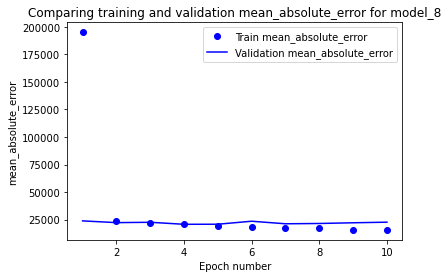

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


20565.0788470818
[38890.03  65738.7   78062.984 ... 51950.203 85747.17  48861.402]
<class 'numpy.ndarray'>
       4-fold_reg_pred
3267      38890.031250
9092      65738.703125
17756     78062.984375
9072      31571.515625
349       34747.351562
...                ...
4569      44823.457031
19575     79713.125000
11131     51950.203125
11369     85747.171875
8033      48861.402344

[5100 rows x 1 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)
[57847 79514 31087 ... 28162 63125 87872]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
54/54 [==============================] - 12s 222ms/step - loss: 621382144.0000 - mean_absolute_error: 17916.2852 - val_loss: 909384640.0000 - val_mean_absolute_error: 20837.0430
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold2/assets
Epoch 2/10
54/54 [==============================] - 11s 209ms/step - loss: 568043904.0000 - mean_absolute_error: 17376.2949 - val_loss: 909887360.0000 - val_mean_absolute_error: 20871.6309
Epoch 3/10
54/54 [==============================] - 12s 215ms/step - loss: 478755520.0000 - mean_absolute_error: 15995.6172 - val_loss: 986916736.0000 - val_mean_absolute_error: 23288.5176
Epoch 4/10
54/54 [==============================] - 11s 207ms/step - loss: 445583680.0000 - mean_absolute_error: 15630.7900 - val_loss: 960358400.0000 - val_mean_absolute_error: 22039.5293
Epoch 5/10
54/54 [==============================] - 11s 207ms/step - loss: 401038464.0000 - mean_absolute_error: 14859.8564 - val_loss: 974743744.0000 - val_mean_ab

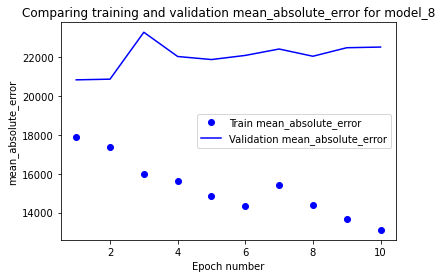

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


15480.935987094057
[65427.12  70986.89  32631.594 ... 39434.312 56551.5   64813.65 ]
<class 'numpy.ndarray'>
       4-fold_reg_pred
3267      38890.031250
9092      65738.703125
17756     78062.984375
9072      31571.515625
349       34747.351562
...                ...
17443     38990.578125
12376    106340.765625
3461      39434.312500
9989      56551.500000
11966     64813.648438

[10200 rows x 1 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)
[ 42083  83008 184091 ... 142639  24517  54942]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
54/54 [==============================] - 13s 244ms/step - loss: 439898912.0000 - mean_absolute_error: 15538.5967 - val_loss: 1036260736.0000 - val_mean_absolute_error: 22116.2344
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold3/assets
Epoch 2/10
54/54 [==============================] - 13s 236ms/step - loss: 415817792.0000 - mean_absolute_error: 15206.7598 - val_loss: 994332672.0000 - val_mean_absolute_error: 22216.9570
Epoch 3/10
54/54 [==============================] - 12s 213ms/step - loss: 366022816.0000 - mean_absolute_error: 14340.8955 - val_loss: 1089991680.0000 - val_mean_absolute_error: 24261.6602
Epoch 4/10
54/54 [==============================] - 12s 213ms/step - loss: 346354176.0000 - mean_absolute_error: 14013.0967 - val_loss: 1158781056.0000 - val_mean_absolute_error: 24909.7051
Epoch 5/10
54/54 [==============================] - 12s 227ms/step - loss: 310885920.0000 - mean_absolute_error: 13278.3555 - val_loss: 1070590784.0000 - val_mea

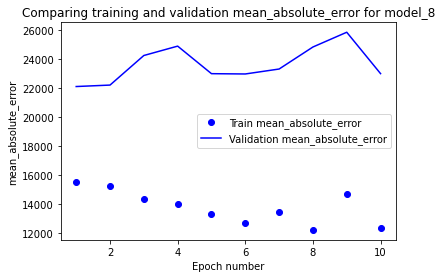

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


14055.694650591682
[ 32741.074  47764.203 136675.66  ... 116910.82   29799.893  28341.342]
<class 'numpy.ndarray'>
       4-fold_reg_pred
3267      38890.031250
9092      65738.703125
17756     78062.984375
9072      31571.515625
349       34747.351562
...                ...
4195      25843.992188
19362     96969.960938
16391    116910.820312
4925      29799.892578
17265     28341.341797

[15300 rows x 1 columns]
(15300, 4, 4096)
(5100, 4, 4096)
(15300,)
(5100,)
[63188 35203 37656 ... 40352 33065 35813]


/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/10
54/54 [==============================] - 12s 214ms/step - loss: 406676352.0000 - mean_absolute_error: 15151.8242 - val_loss: 487085440.0000 - val_mean_absolute_error: 15724.3945
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold4/assets
Epoch 2/10
54/54 [==============================] - 12s 217ms/step - loss: 369314176.0000 - mean_absolute_error: 14586.6631 - val_loss: 404781920.0000 - val_mean_absolute_error: 14972.2959
INFO:tensorflow:Assets written to: /Users/roman/CV/models/best_reg_fold4/assets
Epoch 3/10
54/54 [==============================] - 12s 223ms/step - loss: 262994320.0000 - mean_absolute_error: 12389.5615 - val_loss: 438605344.0000 - val_mean_absolute_error: 15350.3213
Epoch 4/10
54/54 [==============================] - 11s 211ms/step - loss: 252026272.0000 - mean_absolute_error: 12164.8438 - val_loss: 455371168.0000 - val_mean_absolute_error: 15942.3242
Epoch 5/10
54/54 [==============================] - 13s 242ms/step - loss: 235524176

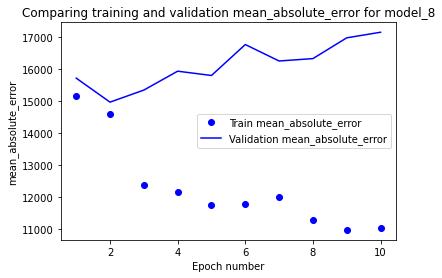

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


14906.855829982384
[71645.09  40118.336 36021.04  ... 59446.973 26887.674 40336.21 ]
<class 'numpy.ndarray'>
       4-fold_reg_pred
3267      38890.031250
9092      65738.703125
17756     78062.984375
9072      31571.515625
349       34747.351562
...                ...
1607      65634.656250
3915      46392.593750
14729     59446.972656
4367      26887.673828
15715     40336.210938

[20400 rows x 1 columns]
OVERALL MEAN MAE: 16252.141328687483
[20565.0788470818, 15480.935987094057, 14055.694650591682, 14906.855829982384]


,4-fold_reg_pred
3267,38890.031250
9092,65738.703125
17756,78062.984375
9072,31571.515625
349,34747.351562
...,...
1607,65634.656250
3915,46392.593750
14729,59446.972656
4367,26887.673828


In [ ]:
batch = 256
epos = 10
metr = 'mean_absolute_error'

df_reg, reg_mae = fourfold_reg(random_order)

print(reg_mae)
df_reg

In [ ]:
dfs_reg = df_reg.sort_index()

reg_pred = np.array(dfs_reg).reshape(20400)

print(len(reg_pred))
reg_pred

reg_bg_mean = []

for i in range(1020):
    start = i * 20
    reg_bg_mean.append(reg_pred[start : start + 20].mean())
print(len(reg_bg_mean))

bins = np.array([  5682. ,  32416.9,  40089. ,  46664.3,  53750. ,  62336. ,
        71687.8,  82003. ,  95456.2, 117833. , 250000. ])

dec_bg_pred = []
for i in range(len(reg_bg_mean)):
    dec_bg_pred.append(sum(reg_bg_mean[i]>bins))
print(len(dec_bg_pred))
    

print(np.bincount(dec_bg_pred))


20400
1020
1020
[  0  31 259 199 113 110 110  77  61  42  18]


20400
1020
1020
[  0   0  19 148 250 257 217 114  14   1]

In [ ]:
pd.Series(dec_bg_pred).to_csv("{}regression_predictions_mean.csv".format(dirCV))

## Visualize income

In [ ]:
import pandas as pd
import geopandas as gpd 
import numpy as np

In [ ]:
dirName = root
inrect = pd.read_csv(dirName + "inrectangle_df.csv")
inrect = inrect.sort_values('GEO7')
inrect

,Unnamed: 0,GEOID,NAME,MEDIAN,ERROR,deciles_LAC,GEO7,inrectangle
0,1306,1500000US060372079001,"Block Group 1, Census Tract 2079, Los Angeles ...",102031,43216,8,60372079001,1
1,1307,1500000US060372079002,"Block Group 2, Census Tract 2079, Los Angeles ...",82993,15527,7,60372079002,1
2,1545,1500000US060372181102,"Block Group 2, Census Tract 2181.10, Los Angel...",45313,13302,2,60372181102,1
3,1547,1500000US060372181202,"Block Group 2, Census Tract 2181.20, Los Angel...",44375,33146,2,60372181202,1
4,1548,1500000US060372181203,"Block Group 3, Census Tract 2181.20, Los Angel...",50301,11886,3,60372181203,1
...,...,...,...,...,...,...,...,...
1015,6035,1500000US060377032002,"Block Group 2, Census Tract 7032, Los Angeles ...",108017,40786,8,60377032002,1
1016,6036,1500000US060377032003,"Block Group 3, Census Tract 7032, Los Angeles ...",58246,5995,4,60377032003,1
1017,6037,1500000US060377032004,"Block Group 4, Census Tract 7032, Los Angeles ...",118594,35901,9,60377032004,1
1018,6038,1500000US060377032005,"Block Group 5, Census Tract 7032, Los Angeles ...",101786,88748,8,60377032005,1


In [ ]:
dirName + "square2010.csv"

'/Users/roman/CV/square2010.csv'

In [ ]:
square2010 = pd.read_csv(dirName + "square2010.csv")
square2010 = square2010.sort_values('GEOID10')
square2010['GEO7'] = square2010['GEOID10']
square2010

,Unnamed: 0,index,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTAre,ShapeSTLen,geometry,GEO7
0,0,5133,5135,60372039001,2039001,203900,0.0534,BG 1,44000.0,44000,Los Angeles,Los Angeles,LA City - Boyle Heights,1.489342e+06,5887.000943,POLYGON ((-118.1924491774824 34.03807985717924...,60372039001
1,1,4938,4940,60372039002,2039002,203900,0.0581,BG 2,44000.0,44000,Los Angeles,Los Angeles,LA City - Boyle Heights,1.618473e+06,6496.447109,POLYGON ((-118.1923961770674 34.03400685679338...,60372039002
2,2,4936,4938,60372039003,2039003,203900,0.0618,BG 3,44000.0,44000,Los Angeles,Los Angeles,LA City - Boyle Heights,1.723617e+06,7329.780250,POLYGON ((-118.1923711771164 34.03116585615251...,60372039003
3,3,5124,5126,60372041101,2041101,204110,0.1567,BG 1,44000.0,44000,Los Angeles,Los Angeles,LA City - Boyle Heights,4.369113e+06,8859.035490,POLYGON ((-118.1964041781608 34.04176585737871...,60372041101
4,4,5123,5125,60372041102,2041102,204110,0.0333,BG 2,44000.0,44000,Los Angeles,Los Angeles,LA City - Boyle Heights,9.285552e+05,4013.002215,POLYGON ((-118.2012781791024 34.03799785654889...,60372041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2159,1818,1819,60379800051,9800051,980005,1.5651,BG 1,80000.0,80000,Torrance,Torrance,City of Torrance,4.363359e+07,31666.623865,"POLYGON ((-118.3436921883705 33.8583288286822,...",60379800051
2160,2160,2104,2106,60379800131,9800131,980013,2.0497,BG 1,22412.0,22412,El Segundo,El Segundo,City of El Segundo,5.714361e+07,34275.585526,POLYGON ((-118.3784412002045 33.92901283442718...,60379800131
2161,2161,2959,2961,60379800251,9800251,980025,1.1466,BG 1,11530.0,11530,Carson,Carson,City of Carson,3.196509e+07,30166.711774,POLYGON ((-118.2484351708952 33.84674483272111...,60379800251
2162,2162,2961,2963,60379800281,9800281,980028,6.7012,BG 1,44000.0,44000,Los Angeles,Los Angeles,LA City - Westchester,1.868192e+08,82673.924736,"POLYGON ((-118.385738202647 33.95530883718521,...",60379800281


In [ ]:
from shapely import wkt

square2010['geometry'] = square2010['geometry'].apply(wkt.loads)
sq = gpd.GeoDataFrame(square2010, crs='epsg:4326')

<AxesSubplot:>

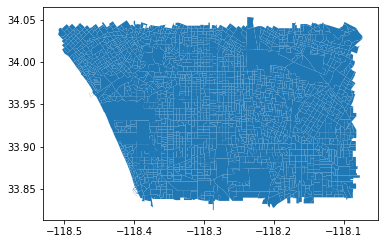

In [ ]:
sq.plot()

Drop BGs if GEO7 is not in list of 1020 GEO7s from inrect.

<AxesSubplot:>

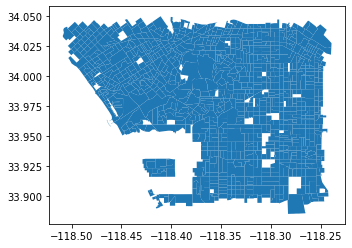

In [ ]:
inr_geo = inrect['GEO7']
sq = sq[sq['GEO7'].isin(inr_geo)]
sq.plot()

In [ ]:
temp = sq.merge(inrect, on='GEO7')
temp = temp.sort_values('GEO7')
dec = temp['deciles_LAC']
dec

0       8
1       7
2       2
3       2
4       3
       ..
1015    8
1016    4
1017    9
1018    8
1019    8
Name: deciles_LAC, Length: 1020, dtype: int64

In [ ]:
sq['deciles_LAC'] = np.array(dec)

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Ground truth

In [ ]:
from sklearn import preprocessing
import numpy as np

x = np.array(dec).reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=((0.1,0.9)))
x_scaled = min_max_scaler.fit_transform(x)
sq['dec_scaled'] = x_scaled 

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

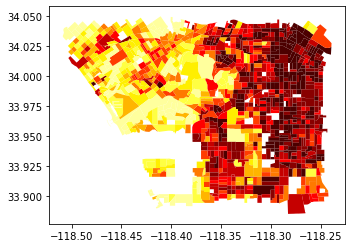

In [ ]:
import matplotlib.cm as cm
sq.plot(color=cm.hot(sq['dec_scaled']), legend=True)

## Nominal regression prediction

In [ ]:
nom_pred_mean = np.array(pd.read_csv(dirName + "nominal_predictions_mean.csv").iloc[:,1])

In [ ]:
nom_pred_fre = np.array(pd.read_csv(dirName + "nominal_predictions_fre.csv", ).iloc[:,1])

### Mean decile prediction

In [ ]:
sq['nom_pred_mean'] = nom_pred_mean

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
temp = np.array(nom_pred_mean).reshape(-1, 1)
temp = min_max_scaler.fit_transform(temp)
sq['nom_mean_scaled'] = temp 

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

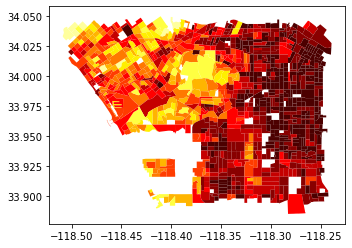

In [ ]:
sq.plot(color=cm.hot(sq['nom_mean_scaled']), legend=True)

### Most frequent decile prediction

In [ ]:
sq['nom_pred_fre'] = nom_pred_fre

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
temp = np.array(nom_pred_fre).reshape(-1, 1)
temp = min_max_scaler.fit_transform(temp)
sq['nom_fre_scaled'] = temp 

/Users/roman/opt/anaconda3/envs/isochrones/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

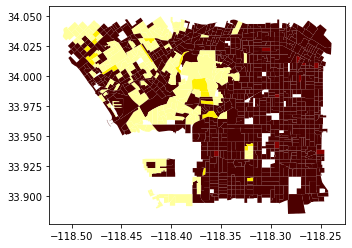

In [ ]:
sq.plot(color=cm.hot(sq['nom_fre_scaled']), legend=True)

## Ordninal classification prediction

In [ ]:
ord_pred_mean = np.array(pd.read_csv(dirName + "ordinal_predictions_mean.csv").iloc[:,1])

In [ ]:
ord_pred_fre = np.array(pd.read_csv(dirName + "ordinal_predictions_fre.csv", ).iloc[:,1])

### Mean decile prediction

In [ ]:
sq['ord_pred_mean'] = ord_pred_mean

In [ ]:
temp = np.array(ord_pred_mean).reshape(-1, 1)
temp = min_max_scaler.fit_transform(temp)
sq['ord_mean_scaled'] = temp 

<AxesSubplot:>

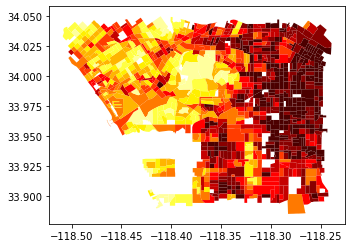

In [ ]:
sq.plot(color=cm.hot(sq['ord_mean_scaled']), legend=True)

### Most frequent decile prediction

In [ ]:
sq['ord_pred_fre'] = ord_pred_fre

In [ ]:
temp = np.array(ord_pred_fre).reshape(-1, 1)
temp = min_max_scaler.fit_transform(temp)
sq['ord_fre_scaled'] = temp 

<AxesSubplot:>

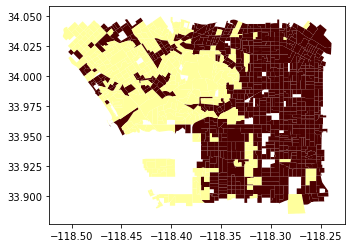

In [ ]:
sq.plot(color=cm.hot(sq['ord_fre_scaled']), legend=True)

## Regression prediction

In [ ]:
reg_pred_mean = np.array(pd.read_csv(dirName + "regression_predictions_mean.csv").iloc[:,1])

### Mean decile prediction

In [ ]:
sq['reg_pred_mean'] = reg_pred_mean

In [ ]:
temp = np.array(reg_pred_mean).reshape(-1, 1)
temp = min_max_scaler.fit_transform(temp)
sq['reg_mean_scaled'] = temp 

<AxesSubplot:>

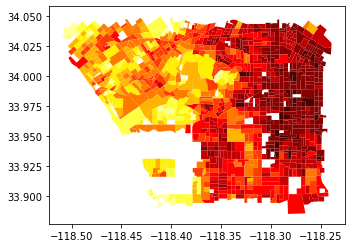

In [ ]:
sq.plot(color=cm.hot(sq['reg_mean_scaled']), legend=True)

In [ ]:
(sq['nom_pred_mean'] == sq['deciles_LAC']).mean()

0.24411764705882352

In [ ]:
(sq['nom_pred_fre'] == sq['deciles_LAC']).mean()

0.2647058823529412

In [ ]:
(sq['ord_pred_mean'] == sq['deciles_LAC']).mean()

0.26372549019607844

In [ ]:
(sq['ord_pred_fre'] == sq['deciles_LAC']).mean()

0.27647058823529413

In [ ]:
(sq['reg_pred_mean'] == sq['deciles_LAC']).mean()

0.2372549019607843

# 6 Discussion

Using street-level images within Los Angeles we predicted household income for small statistical areas. Applying three different models we compared the performance using 4-fold cross-validation. Even though accuracy scores are all not extremely good with between 23 and 28 percent, the ordinal classification model seems to get the patterns the best, as can be seen in the visualized results. 

While our models' performances are worse than those presented by Suel et al. (2021) and are far from being a reliable source of statistical data acquisition, our work shows that even with the presented constraints, models can recognize patterns in street-level imagery that give indications on the average wealth of a neighborhood. 

# References

Acharya, A., Helen, F. und Shubha, R. 2017. Neighborhood Watch: Using CNNs to Predict Income Brackets from Google Street View Images.

Bing Images, accessed 2021, https://docs.microsoft.com/en-us/bingmaps/articles/getting-streetside-tiles-from-imagery-metadata

Cao, W., Mirjalili, V., Raschka, S. 2019. "Rank consistent ordinal regression for neural networks with application to age estimation". Retrieved August 2021 from https://doi.org/10.1016/j.patrec.2020.11.008

Gebru, T., Krause, J., Wang, Y., Chen, D., Deng, J., Aiden, E. L. und Fei-Fei, L. 2017. „Using Deep Learning and Google Street View to Estimate the Demographic Makeup of the US“.

Los Angeles County Administration, accessed 2021, https://egis-lacounty.hub.arcgis.com/datasets/2010-census-block-groups-geography-only/

Lun Liu, Elisabete A. Silva, ChunyangWu, and HuiWang. 2017. A machine learning-based method for the large-scale
evaluation of the qualities of the urban environment. Computers, Environment and Urban Systems 65 (2017), 113–125.
Retrieved Jan 2018 from https://doi.org/10.1016/j.compenvurbsys.2017.06.003
Naik, Nikhil, et al. "Computer vision uncovers predictors of physical urban change." Proceedings of the National Academy of Sciences 114.29 (2017): 7571-7576.
Naik, N., Philipoom, J., Raskar, R. und Hidalgo, C. 2014. „Streetscore -- Predicting the Perceived Safety of One Million Streetscapes“, in 2014 IEEE Conference on Computer Vision and Pattern Recognition Workshops, IEEE.

Ordonez, V. und Berg, T. L. 2014. „Learning High-Level Judgments of Urban Perception“, in Computer vision - ECCV 2014: 13th European conference, Zurich, Switzerland, September 6 - 12, 2014 ; proceedings, part VI, D. Fleet, T. Pajdla, B. Schiele und T. Tuytelaars (Hg.), Cham. 2014, Cham: Springer, S. 494-510.

Rundle, A. G., Bader, M. D. M., Richards, C. A., Neckerman, K. M. und Teitler, J. O. 2011. „Using Google Street View to audit neighborhood environments“, American Journal of Preventive Medicine (40:1), S. 94-100 (doi: 10.1016/j.amepre.2010.09.034).

Stephen Law, Yao Shen, and Chanuki Seresinhe. 2017. An application of convolutional neural        network in street image classification: The case study of London. In Proceedings of the 1st Workshop on Artificial Intelligence and Deep
Learning for Geographic Knowledge Discovery (GeoAI’17). ACM, New York, NY, 5–9. Retrieved Jan 2017 from https://doi.org/10.1145/3149808.3149810

Suel, E., Bhatt, S., Brauer, M., Flaxman, S. und Ezzati, M. 2021. „Multimodal deep learning from satellite and street-level imagery for measuring income, overcrowding, and environmental deprivation in urban areas“, Remote Sensing of Environment (257), S. 112339 (doi: 10.1016/j.rse.2021.112339).

United States Census Bureau, accessed 2021, https://data.census.gov/cedsci/table?t=Income%20%28Households,%20Families,%20Individuals%29&g=0500000US06037.150000&y=2017&d=ACS%205-Year%20Estimates%20Detailed%20Tables&tid=ACSDT5Y2017.B19013